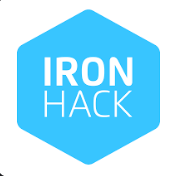

<h1 style="color: saddlebrown;">Final Project</h1>

<h1 style="color: sandybrown;">00 | Data cleaning and preparation </h1>

In [4]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones mathematics
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objs as go

# 🔢 stats
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import kruskal
from scipy.stats import shapiro, normaltest

import scipy.stats as st 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols #Anova eta-2

# 🤖🎓 ML training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 

#⚖️ ML normalizing features
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import category_encoders as ce

# 📐 Ml reporting metrics
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# 🤖 NLP Libraries
import nltk # natural language toolkit
from nltk.sentiment import SentimentIntensityAnalyzer #vader sentiment analysis
import tensorflow as tf #RoBERTa
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification # sequence classification
from nltk import sent_tokenize

In [5]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

nltk.download('vader_lexicon')
tf.keras.losses.SparseCategoricalCrossentropy()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x0000022A64E4A5C0>, kwargs={'from_logits': False, 'ignore_class': None})>

In [6]:
df_info=pd.read_csv("product_info.csv")
df_info.head(3)

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value variation_desc  \
0             NaN            NaN   
1  3.4 oz/ 100 mL            NaN   
2  3.4 oz/ 100 mL            NaN   

                                         ingredients  price_usd  \
0  ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...       35.0   
1  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
2  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   

   value_price_usd  sale_price_usd  limited_edition  new  online_only  \
0              NaN             NaN                0    0            1   
1              NaN             NaN                0    0            1   
2              NaN             NaN                0    0            1   

   out_of_stock  sephora_exclusive  \
0             0                  0   
1             0                  0   
2             0                  0   

                                          highlights primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...        Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   

  secondary_category  tertiary_category  child_count  child_max_price  \
0  Value & Gift Sets  Perfume Gift Sets            0              NaN   
1              Women            Perfume            2             85.0   
2              Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0

In [7]:
#5 review dataframe
df_r1=pd.read_csv("reviews_0-250.csv",index_col=0)
df_r2=pd.read_csv("reviews_250-500.csv", index_col=0)
df_r3=pd.read_csv("reviews_500-750.csv", index_col=0)
df_r4=pd.read_csv("reviews_750-1250.csv", index_col=0)
df_r5=pd.read_csv("reviews_1250-end.csv", index_col=0)

In [8]:
# Concatenate all review dataframes
df_reviews = pd.concat([df_r1, df_r2, df_r3, df_r4, df_r5], ignore_index=True)
df_reviews. head(3)

author_id  rating  is_recommended  helpfulness  total_feedback_count  \
0   1741593524       5             1.0          1.0                     2   
1  31423088263       1             0.0          NaN                     0   
2   5061282401       5             1.0          NaN                     0   

   total_neg_feedback_count  total_pos_feedback_count submission_time  \
0                         0                         2      2023-02-01   
1                         0                         0      2023-03-21   
2                         0                         0      2023-03-21   

                                         review_text  \
0  I use this with the Nudestix “Citrus Clean Bal...   
1  I bought this lip mask after reading the revie...   
2  My review title says it all! I get so excited ...   

                       review_title skin_tone eye_color skin_type hair_color  \
0  Taught me how to double cleanse!       NaN     brown       dry      black   
1                      Disappointed       NaN       NaN       NaN        NaN   
2              New Favorite Routine     light     brown       dry     blonde   

  product_id                                       product_name brand_name  \
0    P504322                     Gentle Hydra-Gel Face Cleanser   NUDESTIX   
1    P420652  Lip Sleeping Mask Intense Hydration with Vitam...    LANEIGE   
2    P420652  Lip Sleeping Mask Intense Hydration with Vitam...    LANEIGE   

   price_usd  
0       19.0  
1       24.0  
2       24.0

In [9]:
# mergre product info dataset and all reviews dataset
df_merged = df_reviews.merge(df_info, on="product_id", how="inner")
df_merged.head(3)

author_id  rating_x  is_recommended  helpfulness  total_feedback_count  \
0   1741593524         5             1.0          1.0                     2   
1  31423088263         1             0.0          NaN                     0   
2   5061282401         5             1.0          NaN                     0   

   total_neg_feedback_count  total_pos_feedback_count submission_time  \
0                         0                         2      2023-02-01   
1                         0                         0      2023-03-21   
2                         0                         0      2023-03-21   

                                         review_text  \
0  I use this with the Nudestix “Citrus Clean Bal...   
1  I bought this lip mask after reading the revie...   
2  My review title says it all! I get so excited ...   

                       review_title skin_tone eye_color skin_type hair_color  \
0  Taught me how to double cleanse!       NaN     brown       dry      black   
1                      Disappointed       NaN       NaN       NaN        NaN   
2              New Favorite Routine     light     brown       dry     blonde   

  product_id                                     product_name_x brand_name_x  \
0    P504322                     Gentle Hydra-Gel Face Cleanser     NUDESTIX   
1    P420652  Lip Sleeping Mask Intense Hydration with Vitam...      LANEIGE   
2    P420652  Lip Sleeping Mask Intense Hydration with Vitam...      LANEIGE   

   price_usd_x                                     product_name_y  brand_id  \
0         19.0                     Gentle Hydra-Gel Face Cleanser      7055   
1         24.0  Lip Sleeping Mask Intense Hydration with Vitam...      6125   
2         24.0  Lip Sleeping Mask Intense Hydration with Vitam...      6125   

  brand_name_y  loves_count  rating_y  reviews            size variation_type  \
0     NUDESTIX          177    5.0000      1.0  2.4 oz / 70 ml           Size   
1      LANEIGE      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   
2      LANEIGE      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   

  variation_value variation_desc  \
0  2.4 oz / 70 ml            NaN   
1        Original            NaN   
2        Original            NaN   

                                         ingredients  price_usd_y  \
0  ['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...         19.0   
1  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
2  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   

   value_price_usd  sale_price_usd  limited_edition  new  online_only  \
0              NaN             NaN                0    0            1   
1              NaN             NaN                0    0            0   
2              NaN             NaN                0    0            0   

   out_of_stock  sephora_exclusive  \
0             0                  0   
1             0                  1   
2             0                  1   

                                          highlights primary_category  \
0                               ['Clean at Sephora']         Skincare   
1  ['allure 2019 Best of Beauty Award Winner', 'C...         Skincare   
2  ['allure 2019 Best of Beauty Award Winner', 'C...         Skincare   

       secondary_category tertiary_category  child_count  child_max_price  \
0               Cleansers               NaN            0              NaN   
1  Lip Balms & Treatments               NaN            3             24.0   
2  Lip Balms & Treatments               NaN            3             24.0   

   child_min_price  
0              NaN  
1             24.0  
2             24.0

<h2 style="color: saddlebrown;">Exploring the Data (First Impression)</h2>

In [11]:
df_info.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [12]:
df_reviews.dtypes

author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

In [13]:
df_info.shape

(8494, 27)

In [14]:
df_reviews.shape

(1094411, 18)

In [15]:
df_merged.shape

(1094411, 44)

In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 44 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating_x                  1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color                8

In [17]:
df_merged.sample()

author_id  rating_x  is_recommended  helpfulness  \
559277  5407382740         5             1.0          NaN   

        total_feedback_count  total_neg_feedback_count  \
559277                     0                         0   

        total_pos_feedback_count submission_time  \
559277                         0      2022-03-01   

                                              review_text review_title  \
559277  *This product was gifted for review*Ok yes! Th...          NaN   

       skin_tone eye_color    skin_type hair_color product_id  \
559277      fair      blue  combination     blonde    P481989   

                                      product_name_x brand_name_x  \
559277  Watermelon Glow Niacinamide Sunscreen SPF 50  Glow Recipe   

        price_usd_x                                product_name_y  brand_id  \
559277         35.0  Watermelon Glow Niacinamide Sunscreen SPF 50      6189   

       brand_name_y  loves_count  rating_y  reviews           size  \
559277  Glow Recipe        64453     3.761   1293.0  1.7 oz/ 50 mL   

       variation_type variation_value variation_desc  \
559277           Size   1.7 oz/ 50 mL            NaN   

                                              ingredients  price_usd_y  \
559277  ['Homosalate 8.5%, Octisalate 5.0%, Octocrylen...         35.0   

        value_price_usd  sale_price_usd  limited_edition  new  online_only  \
559277              NaN             NaN                0    0            0   

        out_of_stock  sephora_exclusive  \
559277             0                  1   

                                               highlights primary_category  \
559277  ['Vegan', 'Hyaluronic Acid', 'Good for: Dullne...         Skincare   

       secondary_category tertiary_category  child_count  child_max_price  \
559277          Sunscreen    Face Sunscreen            0              NaN   

        child_min_price  
559277              NaN

**First impression:**
    
_____________

The following dataset is a collection of approximately **one-milion reviews** of skin care product reviews on Sephora products distributed among 44 different columns. The data types is fairly distributed with 22 objects and 22 numerbcial types.After data cleaning total of 635739 reviews and 29 features are used for data analytics. 

The **project goal** is to factors impacting whether consumer recommened a product or not. Futher to analyse the products ratings and review comments from the consumers. Data extracted from Kaggel (https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data) 

The **strategy** to apprach data analytics for this project is: 

1. The **target** of our dataset will be `is_recommended`, which is indicate whether the consumer recommends the product or not. 
2. Through **Exploratory Data Analysis** will identify the features that contribute to this prediction.
3. Throigh **Sentiment Analysis** identify the emotional tone of the reviews. 
_____________

In [19]:
df = df_merged.copy()

<h2 style="color: saddlebrown;">Standardize Columns</h2>

In [21]:
df.columns

Index(['author_id', 'rating_x', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x',
       'product_name_y', 'brand_id', 'brand_name_y', 'loves_count', 'rating_y',
       'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd_y', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [22]:
df.head(3)

author_id  rating_x  is_recommended  helpfulness  total_feedback_count  \
0   1741593524         5             1.0          1.0                     2   
1  31423088263         1             0.0          NaN                     0   
2   5061282401         5             1.0          NaN                     0   

   total_neg_feedback_count  total_pos_feedback_count submission_time  \
0                         0                         2      2023-02-01   
1                         0                         0      2023-03-21   
2                         0                         0      2023-03-21   

                                         review_text  \
0  I use this with the Nudestix “Citrus Clean Bal...   
1  I bought this lip mask after reading the revie...   
2  My review title says it all! I get so excited ...   

                       review_title skin_tone eye_color skin_type hair_color  \
0  Taught me how to double cleanse!       NaN     brown       dry      black   
1                      Disappointed       NaN       NaN       NaN        NaN   
2              New Favorite Routine     light     brown       dry     blonde   

  product_id                                     product_name_x brand_name_x  \
0    P504322                     Gentle Hydra-Gel Face Cleanser     NUDESTIX   
1    P420652  Lip Sleeping Mask Intense Hydration with Vitam...      LANEIGE   
2    P420652  Lip Sleeping Mask Intense Hydration with Vitam...      LANEIGE   

   price_usd_x                                     product_name_y  brand_id  \
0         19.0                     Gentle Hydra-Gel Face Cleanser      7055   
1         24.0  Lip Sleeping Mask Intense Hydration with Vitam...      6125   
2         24.0  Lip Sleeping Mask Intense Hydration with Vitam...      6125   

  brand_name_y  loves_count  rating_y  reviews            size variation_type  \
0     NUDESTIX          177    5.0000      1.0  2.4 oz / 70 ml           Size   
1      LANEIGE      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   
2      LANEIGE      1081315    4.3508  16118.0    0.7 oz/ 20 g          Color   

  variation_value variation_desc  \
0  2.4 oz / 70 ml            NaN   
1        Original            NaN   
2        Original            NaN   

                                         ingredients  price_usd_y  \
0  ['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...         19.0   
1  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   
2  ['Diisostearyl Malate, Hydrogenated Polyisobut...         24.0   

   value_price_usd  sale_price_usd  limited_edition  new  online_only  \
0              NaN             NaN                0    0            1   
1              NaN             NaN                0    0            0   
2              NaN             NaN                0    0            0   

   out_of_stock  sephora_exclusive  \
0             0                  0   
1             0                  1   
2             0                  1   

                                          highlights primary_category  \
0                               ['Clean at Sephora']         Skincare   
1  ['allure 2019 Best of Beauty Award Winner', 'C...         Skincare   
2  ['allure 2019 Best of Beauty Award Winner', 'C...         Skincare   

       secondary_category tertiary_category  child_count  child_max_price  \
0               Cleansers               NaN            0              NaN   
1  Lip Balms & Treatments               NaN            3             24.0   
2  Lip Balms & Treatments               NaN            3             24.0   

   child_min_price  
0              NaN  
1             24.0  
2             24.0

<h2 style="color: saddlebrown;">Feature Selection (Dropping unnecesary features)</h2>

In [24]:
#cleaning unnecessary columns that are not in the scope of this analysis
df = df.drop(columns=['author_id','submission_time','product_id', 'product_name_y','brand_name_y','brand_id',
                      'size','variation_value','ingredients', 'price_usd_x', 'primary_category','tertiary_category',
                     'child_count','child_max_price', 'child_min_price'], errors='ignore')

In [25]:
df.shape

(1094411, 29)

<h2 style="color: saddlebrown;">Checking Null Values</h2>

In [27]:
df.isnull().sum()

rating_x                          0
is_recommended               167988
helpfulness                  561592
total_feedback_count              0
total_neg_feedback_count          0
total_pos_feedback_count          0
review_text                    1444
review_title                 310654
skin_tone                    170539
eye_color                    209628
skin_type                    111557
hair_color                   226768
product_name_x                    0
brand_name_x                      0
loves_count                       0
rating_y                          0
reviews                           0
variation_type                51455
variation_desc              1086128
price_usd_y                       0
value_price_usd             1063534
sale_price_usd              1084658
limited_edition                   0
new                               0
online_only                       0
out_of_stock                      0
sephora_exclusive                 0
highlights                  

<h2 style="color: saddlebrown;"> Handeling Null Values</h2>

In [29]:
df = df.dropna(axis=1, how='all')
df.shape

(1094411, 29)

In [30]:
# dropping null values
df = df.dropna(subset=["review_text", "review_title", "is_recommended"])

<h2 style="color: saddlebrown;">Checking unique values</h2>

In [32]:
df.apply(lambda x: len(x.unique()))

rating_x                         5
is_recommended                   2
helpfulness                   3036
total_feedback_count           589
total_neg_feedback_count       226
total_pos_feedback_count       524
review_text                 557588
review_title                305080
skin_tone                       15
eye_color                        7
skin_type                        5
hair_color                       8
product_name_x                2324
brand_name_x                   141
loves_count                   2253
rating_y                      1672
reviews                        877
variation_type                   7
variation_desc                  12
price_usd_y                    220
value_price_usd                101
sale_price_usd                  29
limited_edition                  2
new                              2
online_only                      2
out_of_stock                     2
sephora_exclusive                2
highlights                    1615
secondary_category  

In [33]:
df.is_recommended.value_counts()

is_recommended
1.0    531178
0.0    104645
Name: count, dtype: int64

<h2 style="color: saddlebrown;">Checking Duplicates</h2>

In [35]:
df.drop_duplicates(inplace=True)
df.shape

(635739, 29)

<h2 style="color: saddlebrown;">Checking Emtpy Spaces</h2>

In [37]:
df.eq(" ").sum()

rating_x                    0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_name_x              0
brand_name_x                0
loves_count                 0
rating_y                    0
reviews                     0
variation_type              0
variation_desc              0
price_usd_y                 0
value_price_usd             0
sale_price_usd              0
limited_edition             0
new                         0
online_only                 0
out_of_stock                0
sephora_exclusive           0
highlights                  0
secondary_category          0
dtype: int64

<h2 style="color: saddlebrown;">Moving our target to the right</h2>

In [39]:
#taking the target variable out of df
target = df.pop('is_recommended')
#assign target varaible back to dataframe
df['is_recommended'] = target

In [40]:
df.head(3)

rating_x  helpfulness  total_feedback_count  total_neg_feedback_count  \
0         5          1.0                     2                         0   
1         1          NaN                     0                         0   
2         5          NaN                     0                         0   

   total_pos_feedback_count  \
0                         2   
1                         0   
2                         0   

                                         review_text  \
0  I use this with the Nudestix “Citrus Clean Bal...   
1  I bought this lip mask after reading the revie...   
2  My review title says it all! I get so excited ...   

                       review_title skin_tone eye_color skin_type hair_color  \
0  Taught me how to double cleanse!       NaN     brown       dry      black   
1                      Disappointed       NaN       NaN       NaN        NaN   
2              New Favorite Routine     light     brown       dry     blonde   

                                      product_name_x brand_name_x  \
0                     Gentle Hydra-Gel Face Cleanser     NUDESTIX   
1  Lip Sleeping Mask Intense Hydration with Vitam...      LANEIGE   
2  Lip Sleeping Mask Intense Hydration with Vitam...      LANEIGE   

   loves_count  rating_y  reviews variation_type variation_desc  price_usd_y  \
0          177    5.0000      1.0           Size            NaN         19.0   
1      1081315    4.3508  16118.0          Color            NaN         24.0   
2      1081315    4.3508  16118.0          Color            NaN         24.0   

   value_price_usd  sale_price_usd  limited_edition  new  online_only  \
0              NaN             NaN                0    0            1   
1              NaN             NaN                0    0            0   
2              NaN             NaN                0    0            0   

   out_of_stock  sephora_exclusive  \
0             0                  0   
1             0                  1   
2             0                  1   

                                          highlights      secondary_category  \
0                               ['Clean at Sephora']               Cleansers   
1  ['allure 2019 Best of Beauty Award Winner', 'C...  Lip Balms & Treatments   
2  ['allure 2019 Best of Beauty Award Winner', 'C...  Lip Balms & Treatments   

   is_recommended  
0             1.0  
1             0.0  
2             1.0

In [41]:
#checking existance of any null value in dataframe
df.isnull().sum()

rating_x                         0
helpfulness                 316544
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
review_text                      0
review_title                     0
skin_tone                    26198
eye_color                    25832
skin_type                    10964
hair_color                   37958
product_name_x                   0
brand_name_x                     0
loves_count                      0
rating_y                         0
reviews                          0
variation_type               30605
variation_desc              630308
price_usd_y                      0
value_price_usd             617593
sale_price_usd              630635
limited_edition                  0
new                              0
online_only                      0
out_of_stock                     0
sephora_exclusive                0
highlights                   54183
secondary_category               0
is_recommended      

In [42]:
df.shape

(635739, 29)

In [43]:
#filling null values of column value_price_usd and sales_price_usd with price_usd_y 
def fill_prices_columns(df):
    """
    Fills NaN values in 'value_price_usd' and 'sale_price_usd' 
    with values from the 'price_usd_y' column, and returns only the updated columns.
    """
    value_price_filled = df['value_price_usd'].fillna(df['price_usd_y'])
    sale_price_filled = df['sale_price_usd'].fillna(df['price_usd_y'])
    
    return value_price_filled, sale_price_filled

In [44]:
df['value_price_usd'], df['sale_price_usd'] = fill_prices_columns(df)

In [45]:
#filling null values of helpfulness using the formula
df['helpfulness'] = df.apply(
    lambda row: row['total_pos_feedback_count'] / row['total_feedback_count']
    if pd.isnull(row['helpfulness']) and row['total_feedback_count'] > 0 else row['helpfulness'],
    axis=1)

# Fill rows where total_feedback_count equal to 0 with 0
df.loc[df['total_feedback_count'] == 0, 'helpfulness'] = 0

In [46]:
#Retrieve mode from categorical colummns
mode_eye=df['eye_color'].mode()
mode_skin=df['skin_type'].mode()
mode_tone=df['skin_tone'].mode()
mode_hair=df['hair_color'].mode()

In [47]:
# Fill missing values with the calculated modes
df['eye_color'] = df['eye_color'].fillna(mode_eye)
df['skin_type'] = df['skin_type'].fillna(mode_skin)
df['skin_tone'] = df['skin_tone'].fillna(mode_tone)
df['hair_color'] = df['hair_color'].fillna(mode_hair)

In [48]:
#skin_type
mode_skin=df['skin_type'].mode()[0]
# Fill NaN values with the mode
df['skin_type'].fillna(mode_skin, inplace=True)

In [49]:
#eye_color
mode_skin=df['eye_color'].mode()[0]
# Fill NaN values with the mode
df['eye_color'].fillna(mode_skin, inplace=True)

In [50]:
#skin_tone
mode_tone=df['skin_tone'].mode()[0]
# Fill NaN values with the mode
df['skin_tone'].fillna(mode_tone, inplace=True)

#Replace "notSureST" with NaN and fillin with mode
df.loc[df['skin_tone'] == "notSureST", 'skin_tone'] = np.nan  # Replace "notSureST" with NaN
df['skin_tone'].fillna(df['skin_tone'].mode()[0], inplace=True)  # Fill NaN with mode

In [51]:
#hair_tone
mode_hair=df['hair_color'].mode()[0]
# Fill NaN values with the mode
df['hair_color'].fillna(mode_hair, inplace=True)

In [52]:
#variation_type
mode_variation=df['variation_type'].mode()[0]
# Fill NaN values with the mode
df['variation_type'].fillna(mode_variation, inplace=True)

In [53]:
#highlights
mode_highlights=df['highlights'].mode()[0]
# Fill NaN values with the mode
df['highlights'].fillna(mode_highlights, inplace=True)

In [54]:
#variation_desc
df["variation_desc"]=df["variation_desc"].fillna("no description")

In [55]:
df.isnull().sum()

rating_x                    0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_name_x              0
brand_name_x                0
loves_count                 0
rating_y                    0
reviews                     0
variation_type              0
variation_desc              0
price_usd_y                 0
value_price_usd             0
sale_price_usd              0
limited_edition             0
new                         0
online_only                 0
out_of_stock                0
sephora_exclusive           0
highlights                  0
secondary_category          0
is_recommended              0
dtype: int64

In [56]:
# Save as csv
df.to_csv("sephora_cleaned.csv", index=False)

<h2 style="color: saddlebrown;">Statistical information about the numerical columns</h2>

In [58]:
df.describe().T.round(2)

count       mean        std  min       25%  \
rating_x                  635739.0       4.29       1.18  1.0      4.00   
helpfulness               635739.0       0.39       0.44  0.0      0.00   
total_feedback_count      635739.0       4.63      24.59  0.0      0.00   
total_neg_feedback_count  635739.0       0.99       5.53  0.0      0.00   
total_pos_feedback_count  635739.0       3.65      21.41  0.0      0.00   
loves_count               635739.0  109104.57  178285.44  0.0  14302.00   
rating_y                  635739.0       4.29       0.29  1.0      4.14   
reviews                   635739.0    2040.85    2532.62  1.0    509.00   
price_usd_y               635739.0      50.55      41.69  3.0     26.00   
value_price_usd           635739.0      51.10      42.74  3.0     26.00   
sale_price_usd            635739.0      50.43      41.73  3.0     25.00   
limited_edition           635739.0       0.02       0.14  0.0      0.00   
new                       635739.0       0.03       0.17  0.0      0.00   
online_only               635739.0       0.11       0.31  0.0      0.00   
out_of_stock              635739.0       0.03       0.17  0.0      0.00   
sephora_exclusive         635739.0       0.37       0.48  0.0      0.00   
is_recommended            635739.0       0.84       0.37  0.0      1.00   

                               50%        75%        max  
rating_x                      5.00       5.00        5.0  
helpfulness                   0.00       0.93        1.0  
total_feedback_count          1.00       4.00     5464.0  
total_neg_feedback_count      0.00       1.00     1159.0  
total_pos_feedback_count      0.00       3.00     5050.0  
loves_count               44288.00  121486.00  1081315.0  
rating_y                      4.34       4.50        5.0  
reviews                    1217.00    2554.00    16118.0  
price_usd_y                  40.00      65.00     1900.0  
value_price_usd              40.00      65.00     1900.0  
sale_price_usd               40.00      65.00     1900.0  
limited_edition               0.00       0.00        1.0  
new                           0.00       0.00        1.0  
online_only                   0.00       0.00        1.0  
out_of_stock                  0.00       0.00        1.0  
sephora_exclusive             0.00       1.00        1.0  
is_recommended                1.00       1.00        1.0

<h2 style="color: saddlebrown;">Selecting numerical</h2>

In [60]:
# General Selection for categorical and numerical data
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] 
cat = pd.concat([cat, cat_from_num], axis=1)
#num = num.drop(columns=cat_from_num.columns)

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

<h2 style="color: saddlebrown;">Checking Distributions</h2>

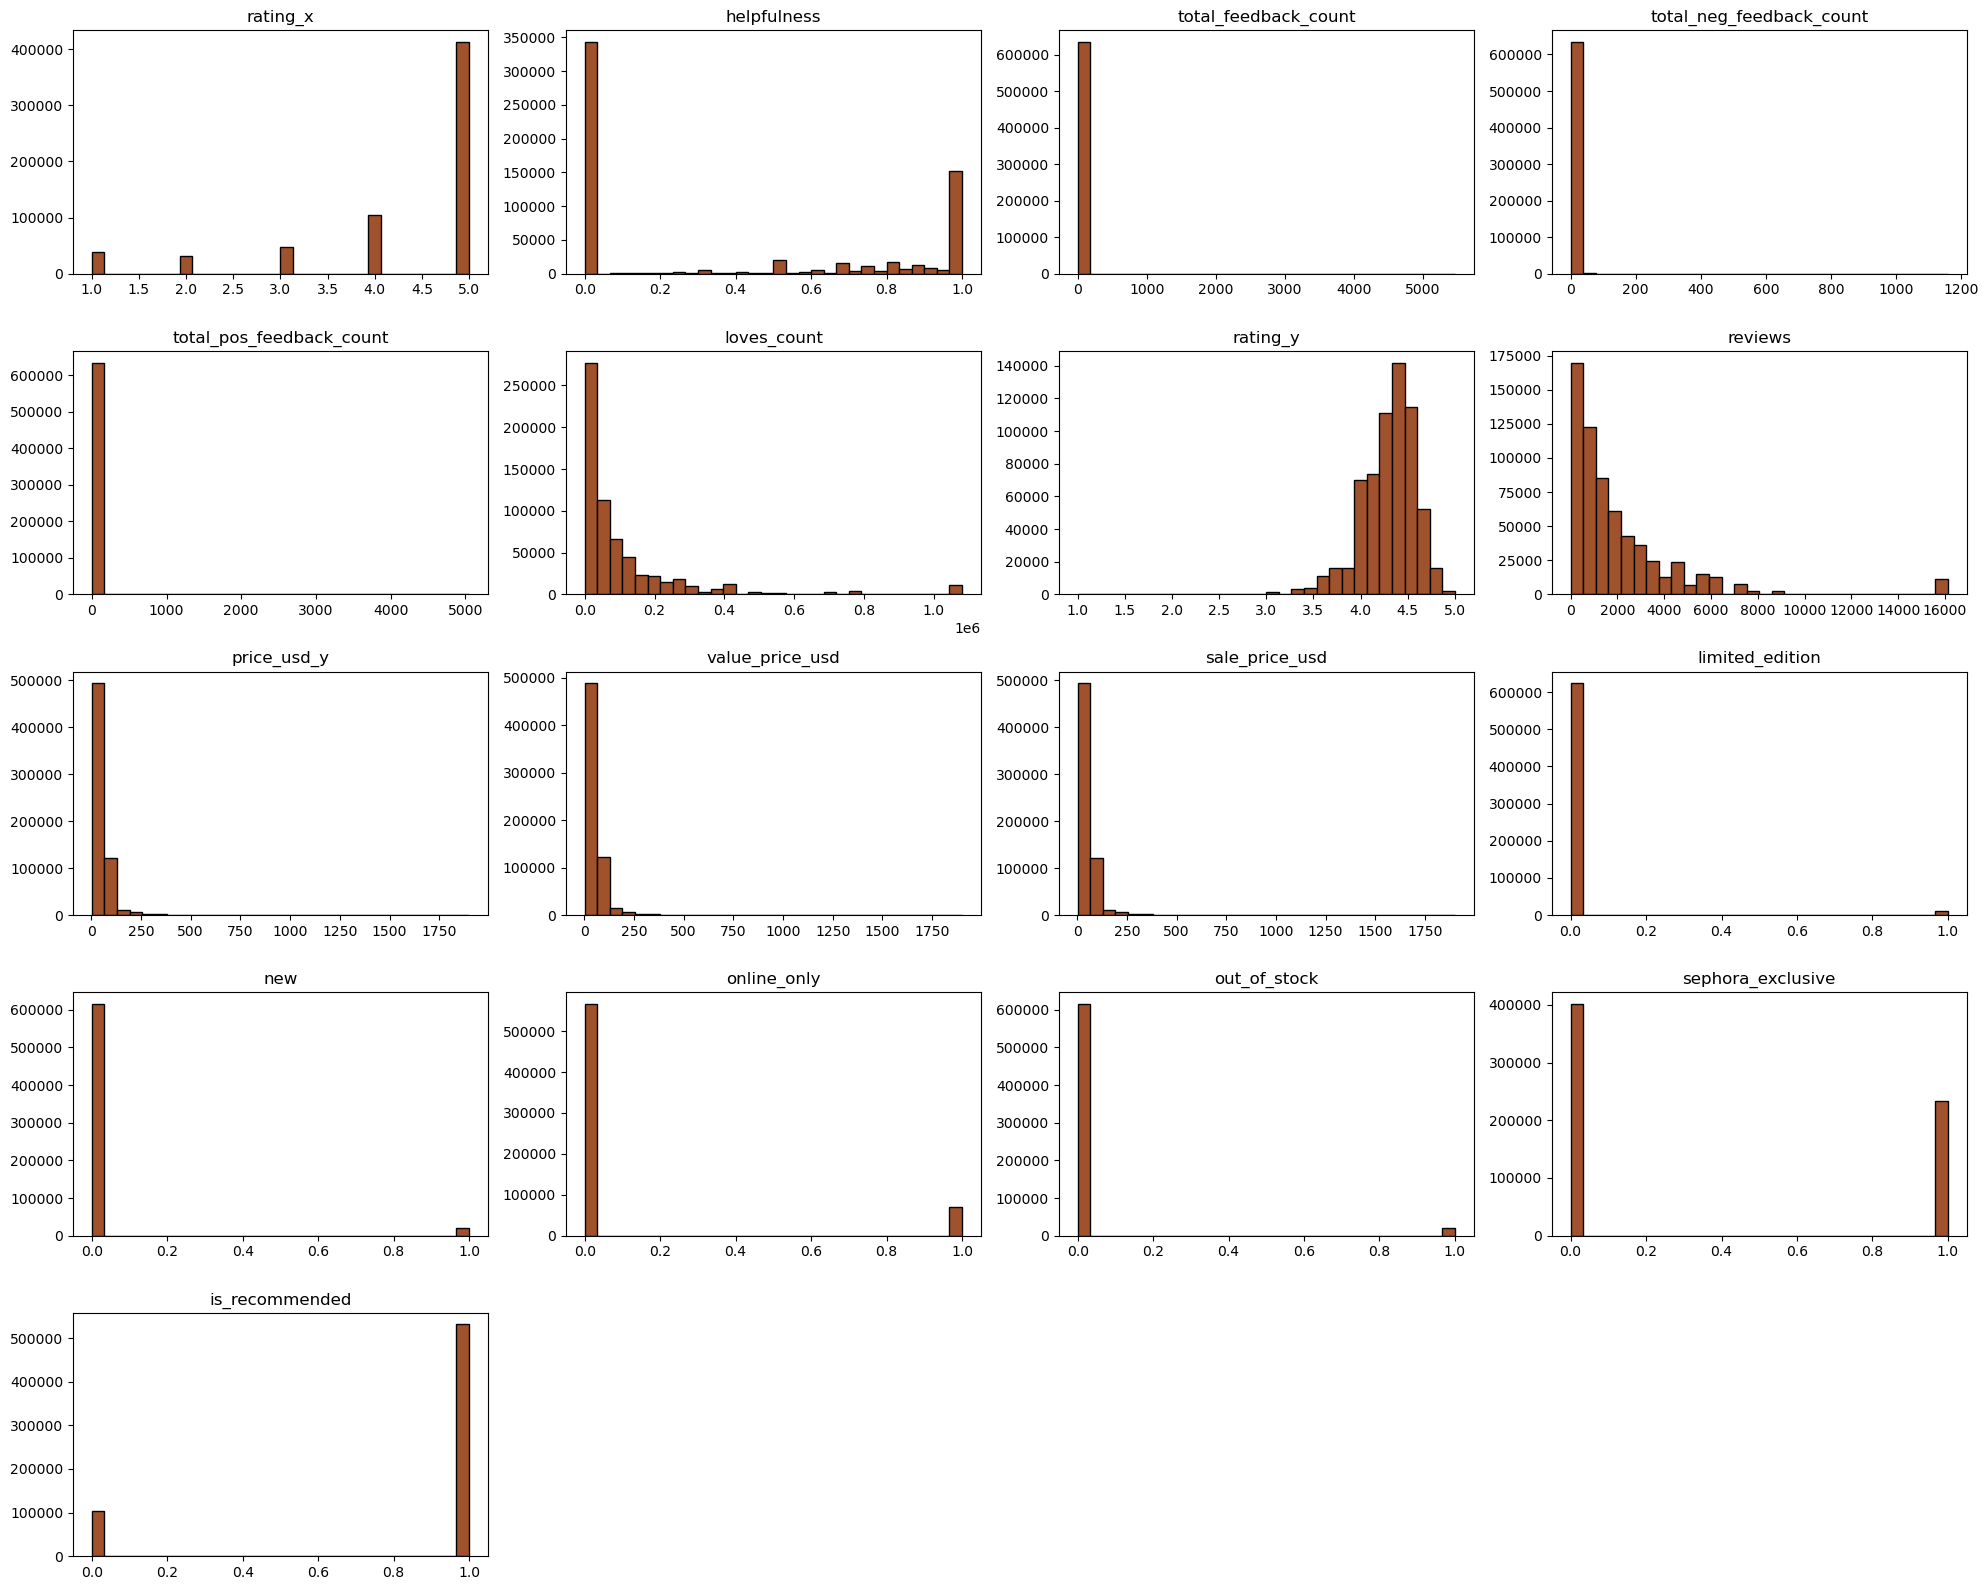

In [62]:
# Filter numeric columns to show the disrtibution on histogram
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(numeric_columns):
        ax.set_visible(False)  # hide unused plots
        continue
    column_name = numeric_columns[i]
    ax.hist(df[column_name].dropna(), bins=30, color='sienna', edgecolor='black')  # drop NaNs
    ax.set_title(column_name)

plt.tight_layout()
plt.show()

<h2 style="color: saddlebrown;">Checking Outliers</h2>

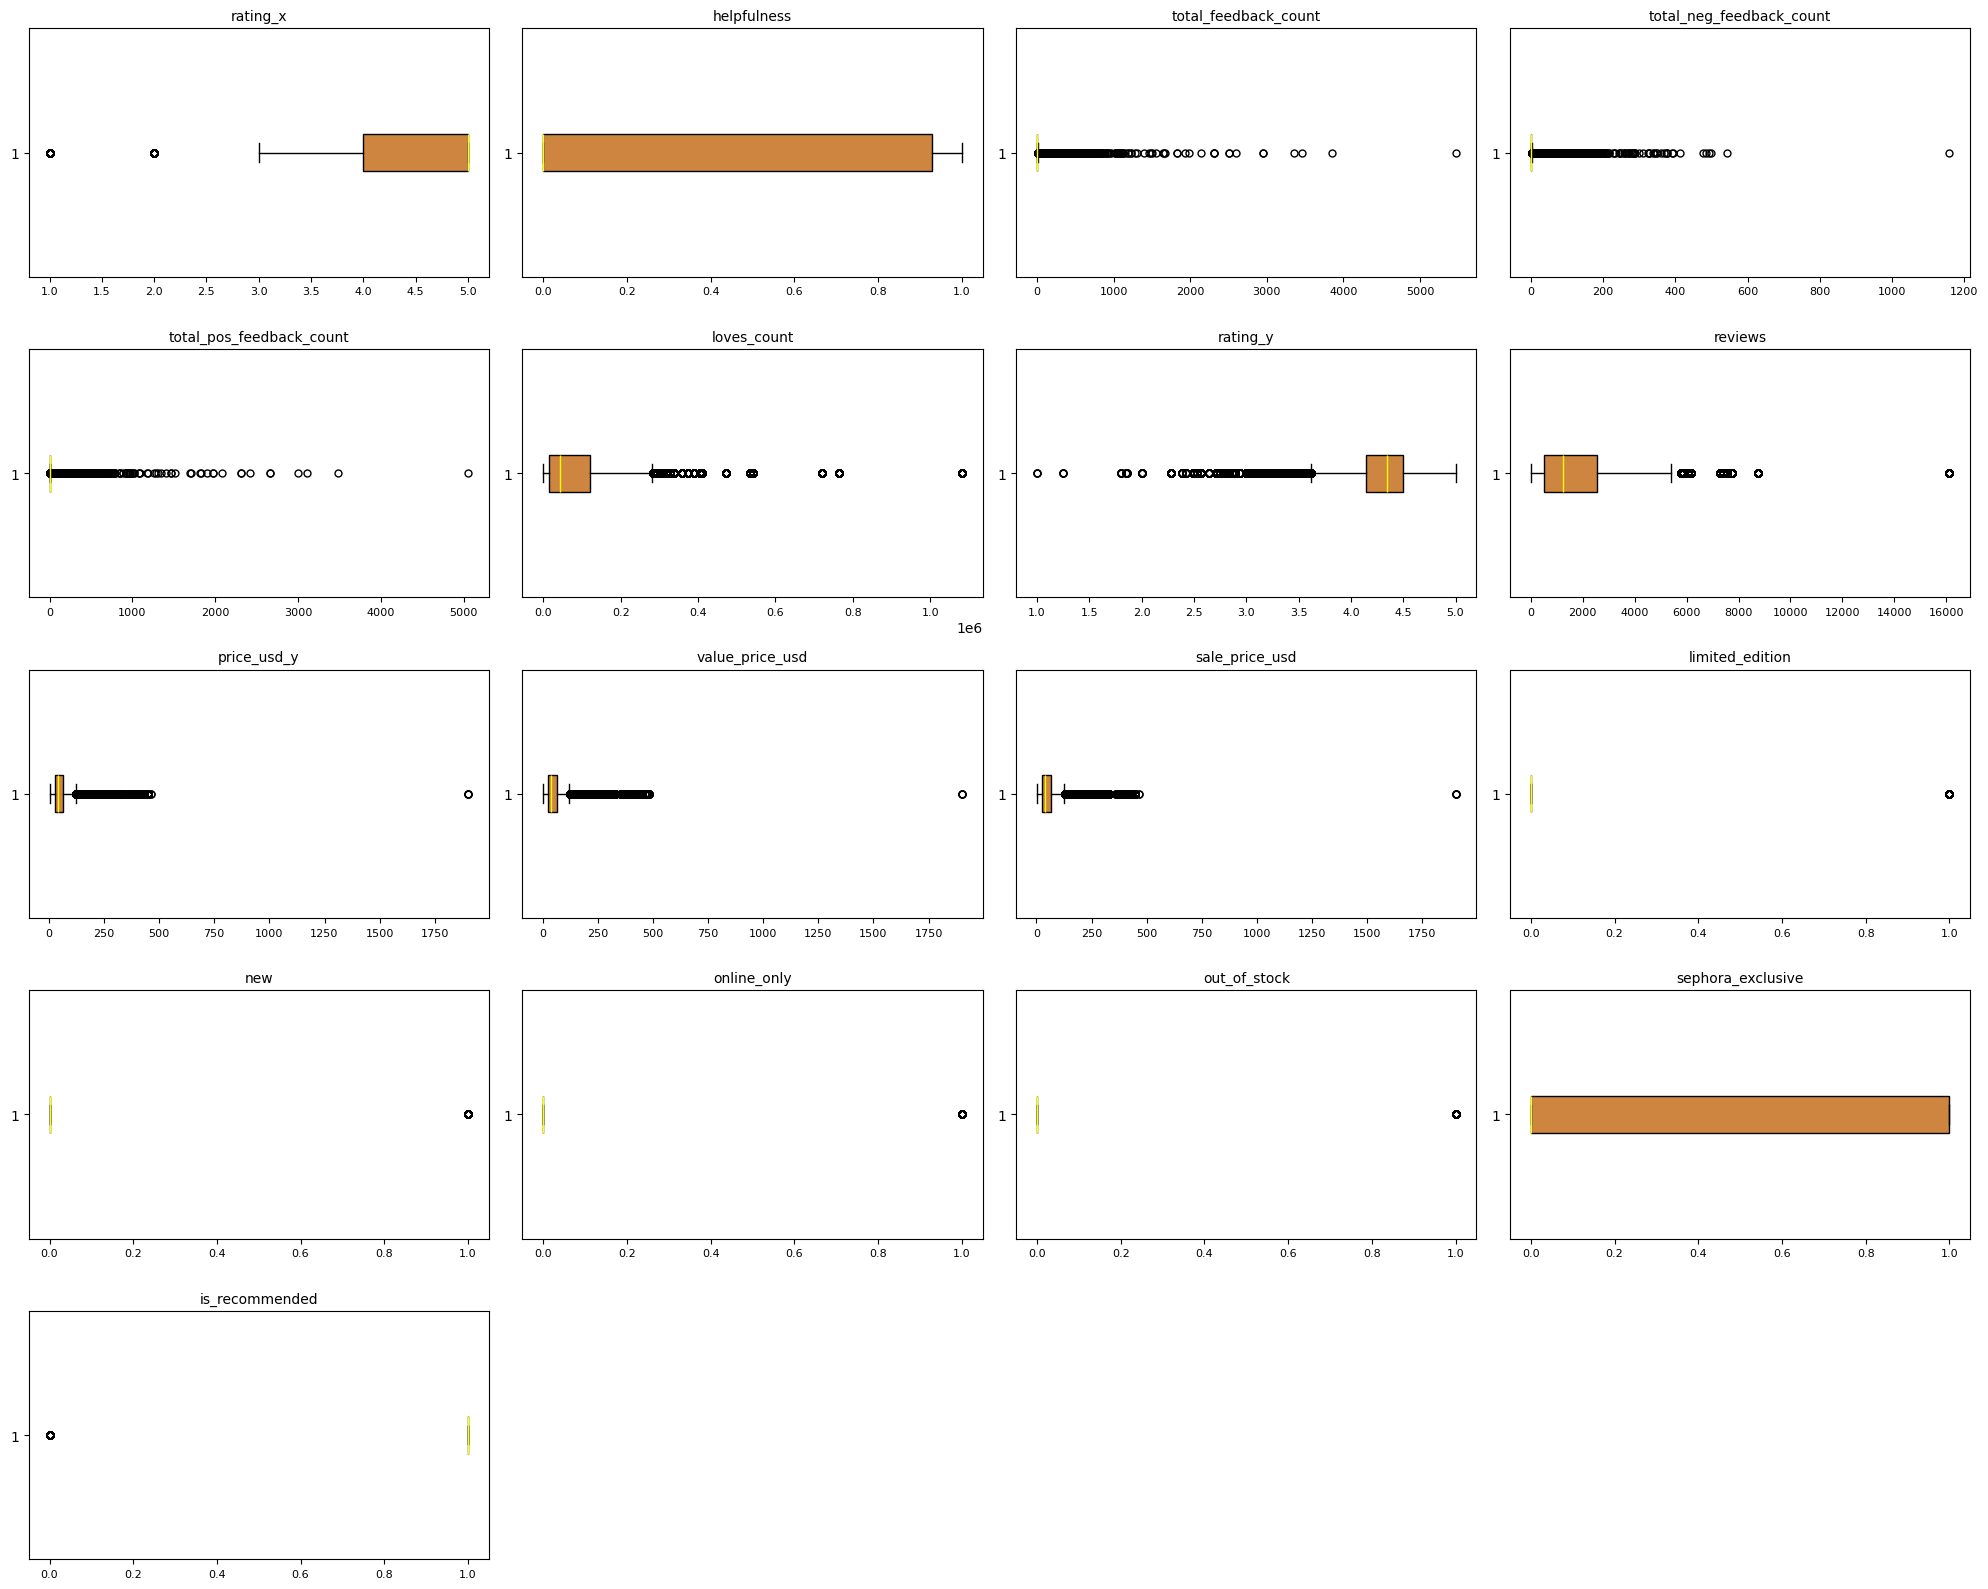

In [64]:
color = 'peru'
# Grid size
nrows, ncols = 5, 4  # adjust based on the number of numeric columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Plot each numeric column
for i, ax in enumerate(axes):
    if i >= len(numeric_columns):  
        ax.set_visible(False)
        continue
    column_name = numeric_columns[i]
    ax.boxplot(df[column_name].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(column_name, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [65]:
# Dealing with outliers
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [66]:
df_no_outliers = outlier_slayer(df)

As the analysis would be more benefitial to capture all data, havent dropped the outliers from dataframe

<h2 style="color: saddlebrown;">Looking for Correlations</h2>

In [69]:
# making sure is_recommended is numeric and no nan values
df['is_recommended'] = pd.to_numeric(df['is_recommended'], errors='coerce')
df.dropna(subset=['is_recommended'], inplace=True)

In [70]:
# checking the correlation of is_recommended with all variables
num.corr()["is_recommended"].sort_values(ascending=False)

is_recommended              1.000000
rating_x                    0.857239
rating_y                    0.228599
new                         0.033831
price_usd_y                 0.022045
sale_price_usd              0.021917
value_price_usd             0.021664
online_only                 0.018339
limited_edition            -0.000662
out_of_stock               -0.005849
reviews                    -0.009432
sephora_exclusive          -0.014449
loves_count                -0.026691
total_pos_feedback_count   -0.056233
total_feedback_count       -0.086377
helpfulness                -0.126264
total_neg_feedback_count   -0.166236
Name: is_recommended, dtype: float64

Variables like `rating_x` have strong positive correlations with is_recommended and `rating_y` and moderate positive correlation suggesting that as these variables increase, the recommendation is positive.
While `total_neg_feedback_count` and `helpfulness `have moderate negative correlations with is_recommended. 

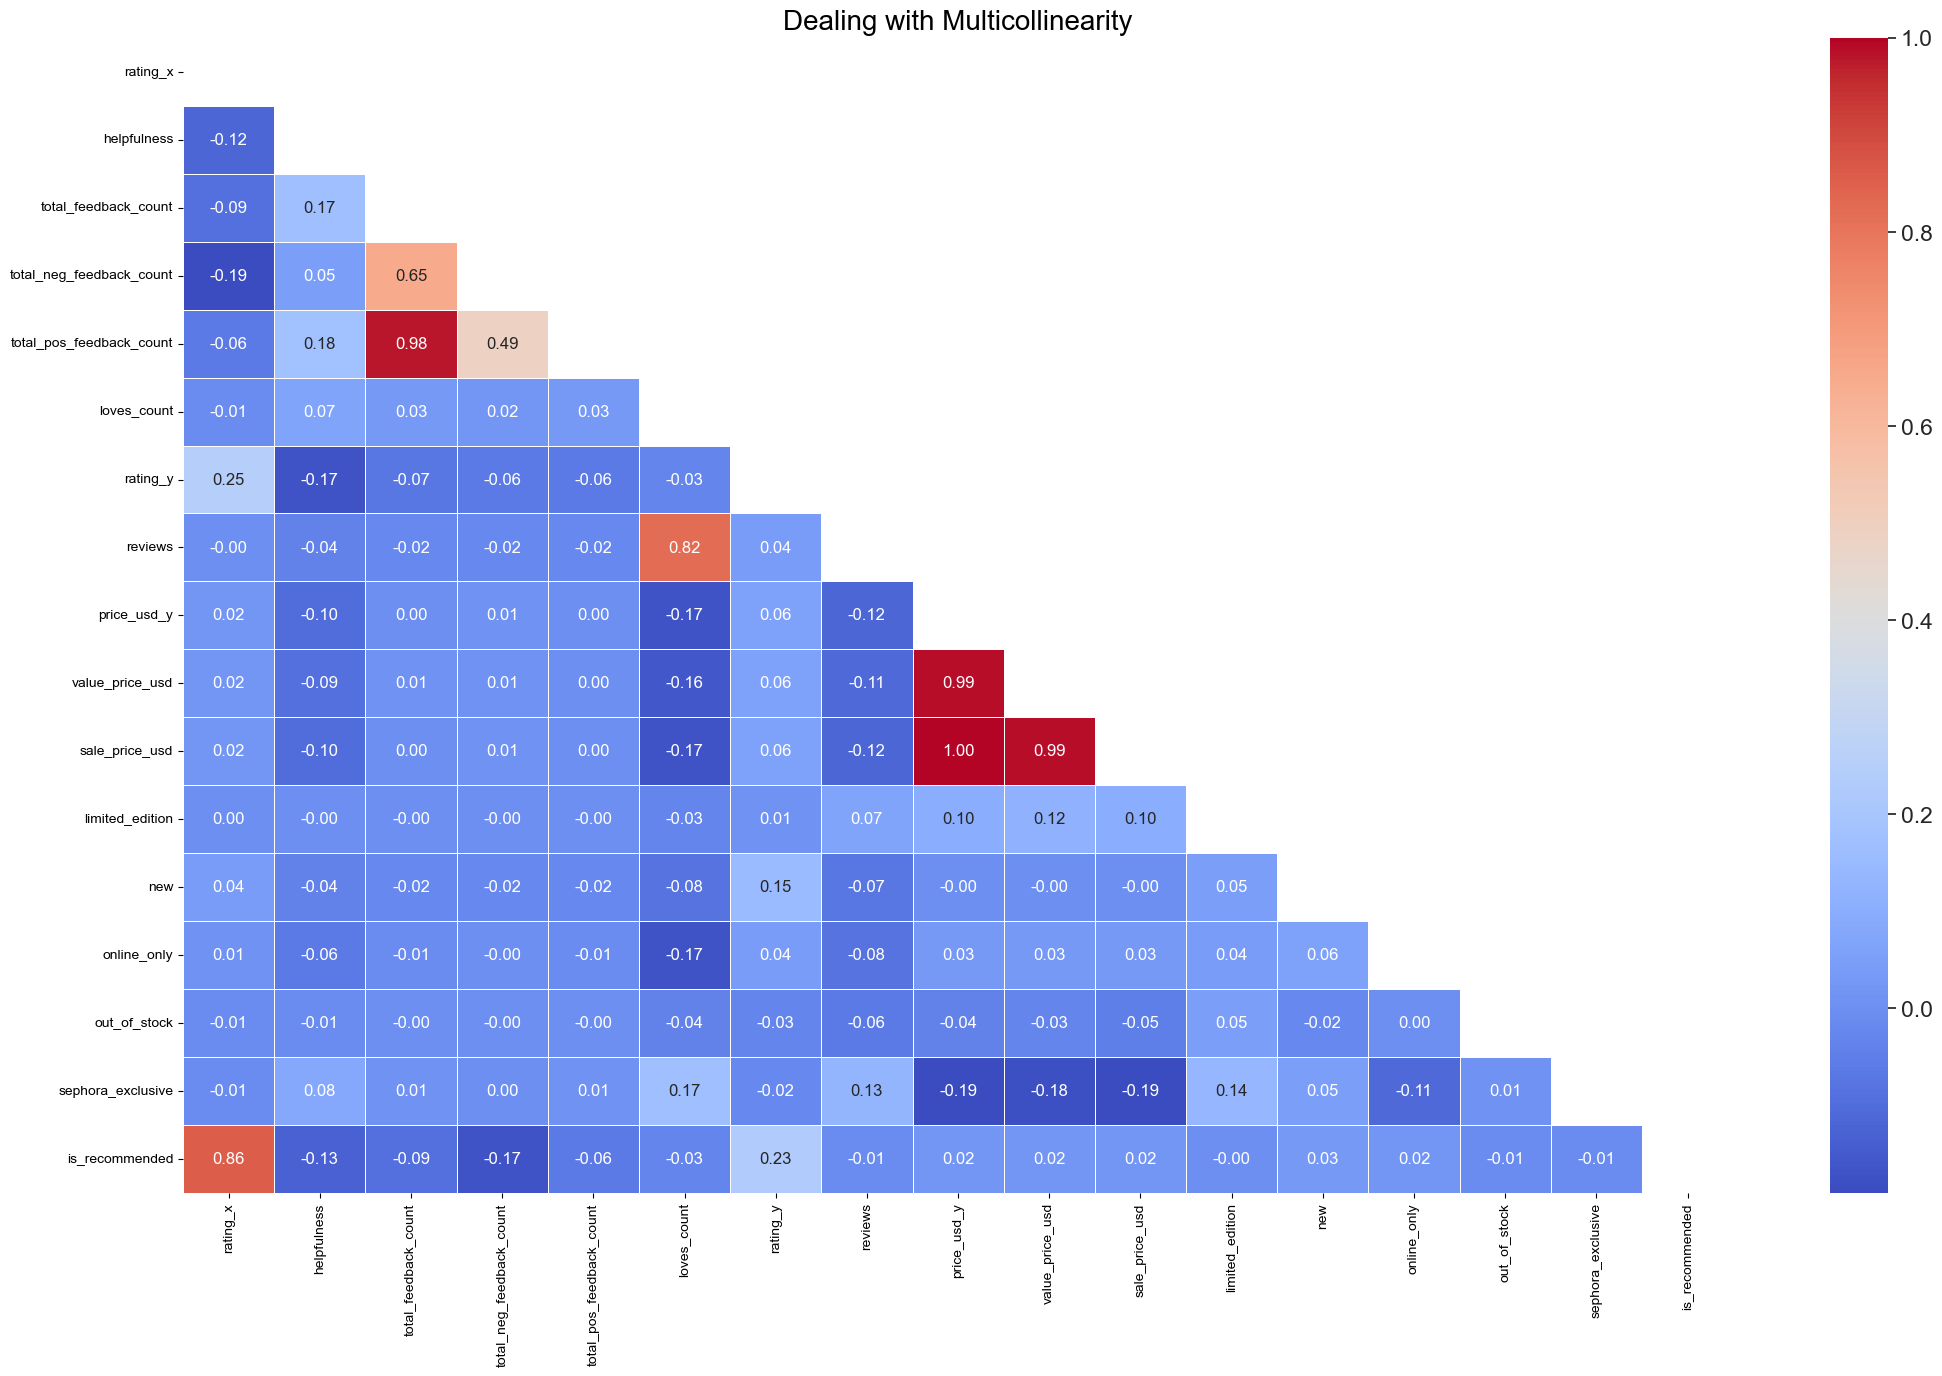

In [72]:
#Create heatmap or Correlation matrix
num_corr = num.corr().round(2)

# Create the mask and plot heatmap
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True  # to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)  # Increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12},
                 linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) 
ax.set_title("Dealing with Multicollinearity", fontsize=20) 
plt.show()

<h3 style="color: saddlebrown;">Distribution of is_recommended</h3>

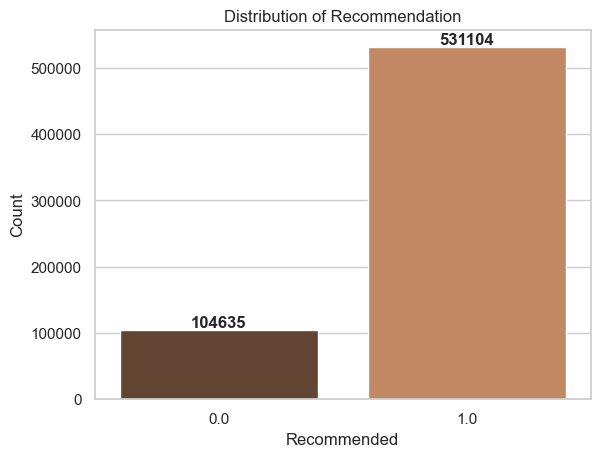

In [74]:
sns.set(style='whitegrid', palette='Set2')
ax = sns.countplot(data=df, x="is_recommended", palette="copper")
for p in ax.patches: # Add the values on top of the bars
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.title("Distribution of Recommendation")
plt.show()

<h3 style="color: saddlebrown;">Scattered plot Original price and Discount price</h3>

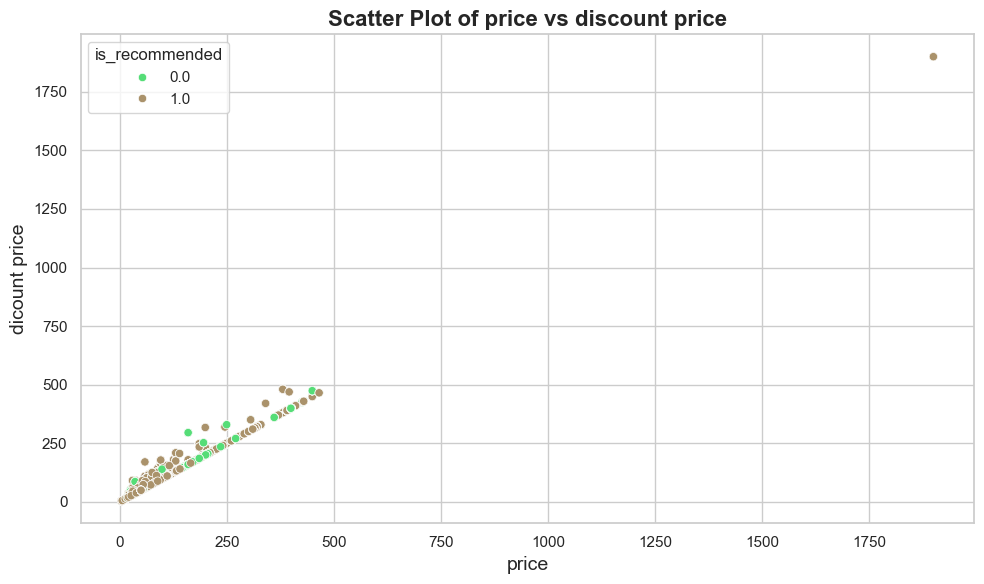

In [76]:
#Scattered plot for original price (prise_usd_y) and Disocunt price (value_price_usd)
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    x="price_usd_y",
    y="value_price_usd",
    hue="is_recommended",
    data=df,
    palette="terrain"
)

plt.title("Scatter Plot of price vs discount price", fontsize=16, fontweight='bold')
plt.xlabel("price", fontsize=14)
plt.ylabel("dicount price", fontsize=14)

plt.tight_layout()
plt.show()

<h2 style="color: saddlebrown;">Statistical Tests - Chi square</h2>

<h3 style="color: saddlebrown;">Hypothesis 0</h3>

**Null hypothesis (H0):** There is no significant association between is_recommended and skin_tone.

**Alternative hypothesis (H1):** There is significant association between is_recommended and skin_tone.

In [80]:
#Here is-recommended is considered as a categorical variable as there is few unique values
#Total number of entries for recommendation per skin_tone
group_skintone = df.groupby('skin_tone')['is_recommended'].count().sort_values(ascending=False)

In [81]:
#create contingency table to count each 0 and 1 value of is_recommended
crosstab_analysis = pd.crosstab(df['is_recommended'], df['skin_tone']).T
crosstab_analysis = crosstab_analysis.sort_values(by=1, ascending=False)  # sort by is_recommended = 1
crosstab_analysis

is_recommended    0.0     1.0
skin_tone                    
light           33104  167324
fair            23622  112948
lightMedium     20219  108265
medium           7001   40410
mediumTan        6868   33830
fairLight        7046   32063
tan              3562   18817
deep             2244   12060
rich              532    3379
porcelain         219     883
olive             169     843
dark               48     281
ebony               1       1

In [82]:
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.50f}")

# Interpret the p-value
alpha = 0.05
if chi2_pvalue < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between skin_tone and is_recommended.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between skin_tone and is_recommended.")

chi2_pvalue: 0.00000000000000000000000000000000000000000000000000
Reject the null hypothesis (H0): There is a significant association between skin_tone and is_recommended.


In [83]:
#association strength with Cramer's V
Cramer_V_amount=association(crosstab_analysis, method='cramer')

# Cramer's V
print(f"Cramer's V: {Cramer_V_amount:.2f}")

# Interpret Cremar's V
if abs(Cramer_V_amount) < 0.2:
    print("The effect size is small.")
elif abs(Cramer_V_amount) < 0.4:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cramer's V: 0.02
The effect size is small.


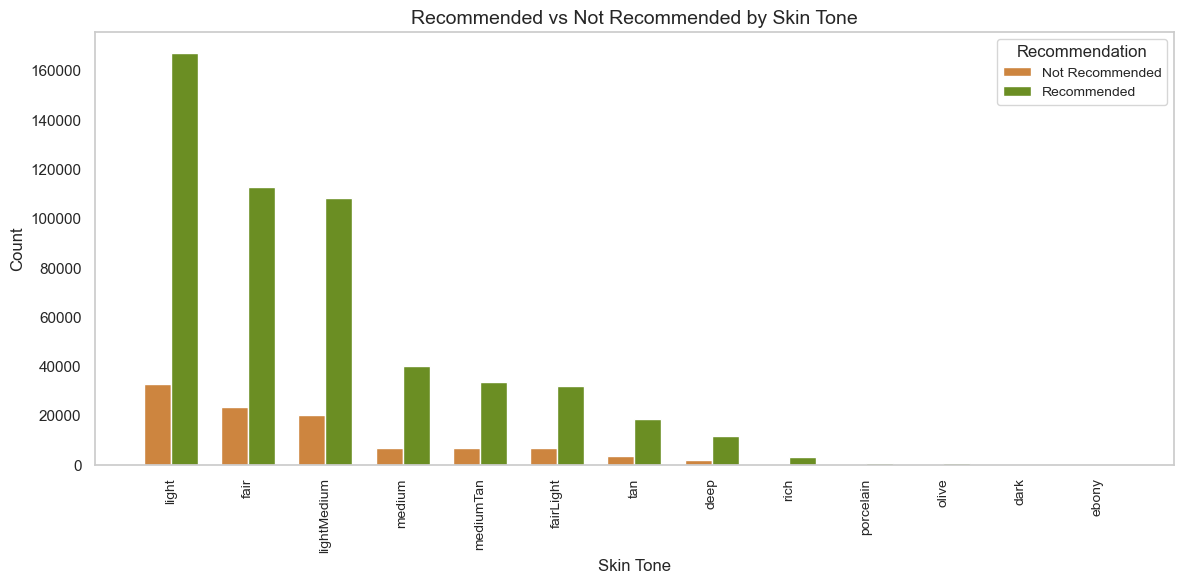

In [84]:
# Extract skin tones and recommendation counts
skin_tones = crosstab_analysis.index
not_recommended = crosstab_analysis[0]  # Count of not recommended (0)
recommended = crosstab_analysis[1]  # Count of recommended (1)

# Bar width and positions
bar_width = 0.35
x = np.arange(len(skin_tones))

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for Not recommended
ax.bar(x - bar_width/2, not_recommended, width=bar_width, label='Not Recommended', color='peru')

# Plot for Recommended
ax.bar(x + bar_width/2, recommended, width=bar_width, label='Recommended', color='olivedrab')

# Customization
plt.title('Recommended vs Not Recommended by Skin Tone', fontsize=14)
plt.xlabel('Skin Tone', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x, skin_tones, rotation=90, fontsize=10)  # Rotate for readability
plt.legend(title='Recommendation', fontsize=10)
plt.tight_layout()
plt.grid(False)

# Show plot
plt.show()

<h3 style="color: saddlebrown;">Hypothesis 1</h3>


**Null hypothesis (H0):** There is no significant association between secondary_category and skin_tone.

**Alternative hypothesis (H1):** There is significant association between secondary_categroy and skin_tone.

In [87]:
#Total number of entries for recommendation per secondry category
group_category = df.groupby('secondary_category')['skin_tone'].count().sort_values(ascending=False)

In [88]:
#create contingency table to count each 0 and 1 value of recommendation
crosstab_analysis = pd.crosstab(df['skin_tone'], df['secondary_category']).T
crosstab_analysis["Total"] = crosstab_analysis.sum(axis=1)  # add a total count column
crosstab_analysis = crosstab_analysis.sort_values(by="Total", ascending=False)
crosstab_analysis = crosstab_analysis.drop(columns=["Total"])  # drop the extra column after sorting

In [89]:
#chi squared test
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.70f}")

# Interpret the p-value
alpha = 0.05
if chi2_pvalue < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between skin_tone and category.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between skin_tone and category.")

chi2_pvalue: 0.0000000000000000000000000000000000000000000000000000000000000000000000
Reject the null hypothesis (H0): There is a significant association between skin_tone and category.


In [90]:
#association strength with Cramer's V
Cramer_V_amount=association(crosstab_analysis, method='cramer')

# Cramer's V
print(f"Cramer's V: {Cramer_V_amount:.2f}")

# Interpret Cremar's V
if abs(Cramer_V_amount) < 0.2:
    print("The effect size is small.")
elif abs(Cramer_V_amount) < 0.4:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cramer's V: 0.02
The effect size is small.


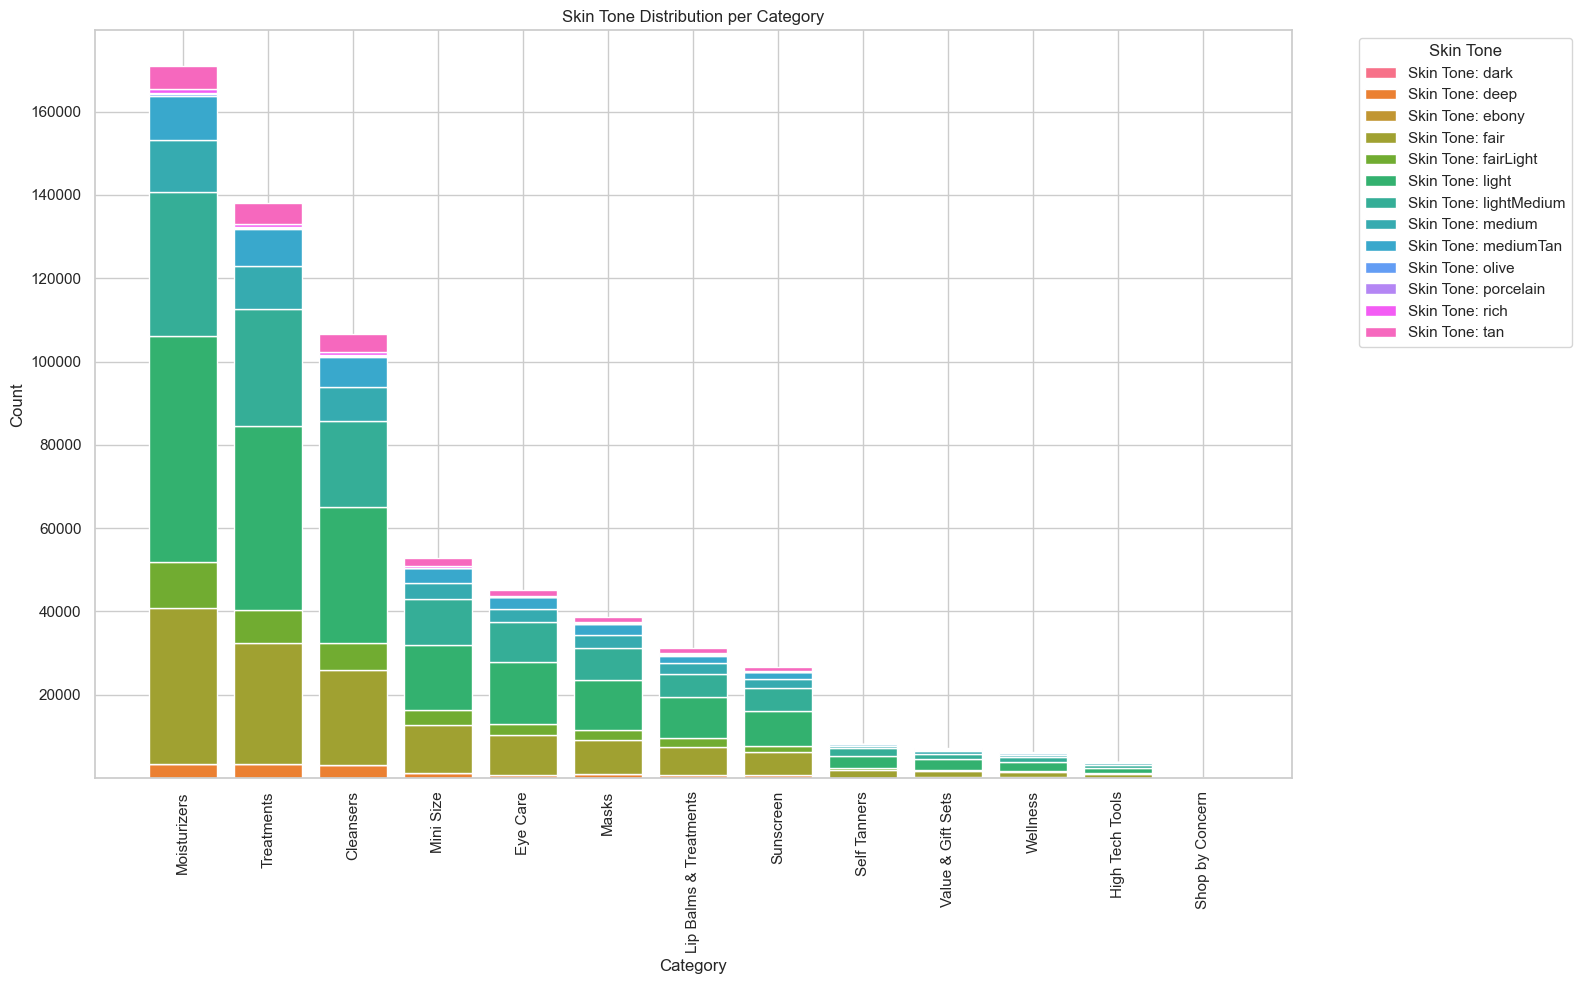

In [91]:
# Define categories and skin tones
categories = crosstab_analysis.index
skin_tones = crosstab_analysis.columns
values = crosstab_analysis.T  # Transpose for stacking

# Generate unique colors for each skin tone using Seaborn palette
palette = sns.color_palette("husl", len(skin_tones))  # "husl" gives distinct colors

# Create plot
fig, ax = plt.subplots(figsize=(16, 10))
bottom = np.zeros(len(categories))

# Plot stacked bars for each skin tone 
for i, tone in enumerate(skin_tones):
    ax.bar(categories, values.loc[tone], label=f'Skin Tone: {tone}', bottom=bottom, color=palette[i])
    bottom += values.loc[tone].values

plt.title("Skin Tone Distribution per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)  
plt.legend(title="Skin Tone", bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

<h3 style="color: saddlebrown;">Hypothesis 2</h3>

**Null hypothesis (H0):** There is no significant association between is recommended and brand name.

**Alternative hypothesis (H1):** There is significant association between is recommended and brand name.

In [94]:
#Total number of entries for recommendation per skin_tone
group_brand_name = df.groupby('brand_name_x')['is_recommended'].count().sort_values(ascending=False)

In [95]:
#create contingency table to count each 0 and 1 value of is_recommended
crosstab_analysis = pd.crosstab(df['is_recommended'], df['brand_name_x']).T
crosstab_analysis = crosstab_analysis.sort_values(by=1, ascending=False)  # sort by recommended = 1
crosstab_analysis

is_recommended            0.0    1.0
brand_name_x                        
Tatcha                   5811  24193
Drunk Elephant           6599  20804
The Ordinary             4553  20125
Glow Recipe              3526  18067
fresh                    2788  16590
...                       ...    ...
Soleil Toujours             4     24
caliray                     1     19
Anastasia Beverly Hills     3     18
iluminage                   9     13
TWEEZERMAN                 19     11

[141 rows x 2 columns]

In [96]:
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.50f}")

# Interpret the p-value
alpha = 0.05
if chi2_pvalue < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between Brand name and is_recommended.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between Brand name and is_recommended.")

chi2_pvalue: 0.00000000000000000000000000000000000000000000000000
Reject the null hypothesis (H0): There is a significant association between Brand name and is_recommended.


In [97]:
#association strength with Cramer's V
Cramer_V_amount=association(crosstab_analysis, method='cramer')

# Cramer's V
print(f"Cramer's V: {Cramer_V_amount:.2f}")

# Interpret Cremar's V
if abs(Cramer_V_amount) < 0.2:
    print("The effect size is small.")
elif abs(Cramer_V_amount) < 0.4:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cramer's V: 0.13
The effect size is small.


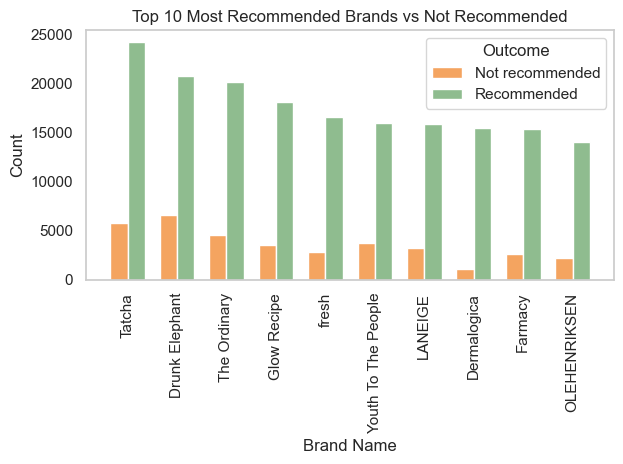

In [98]:
# Filter contingency table for rows where the count of recommended 1 is greater than 10
filtered_crosstab = crosstab_analysis.loc[crosstab_analysis[1] > 10]
# Sort the filtered table
filtered_sorted_crosstab = filtered_crosstab.sort_values(by=1, ascending=False).head(10)

# Plotting Recommended and Not Recommended
brand_name = filtered_sorted_crosstab.index
not_recommended = filtered_sorted_crosstab[0]
recommended = filtered_sorted_crosstab[1]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(brand_name))

# Plot bars for "Not recommended"
plt.bar(x - bar_width/2, not_recommended, width=bar_width, label='Not recommended', color='sandybrown')

# Plot bars for "Recommended"
plt.bar(x + bar_width/2, recommended, width=bar_width, label='Recommended', color='darkseagreen')

plt.title('Top 10 Most Recommended Brands vs Not Recommended')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(x, brand_name, rotation=90)
plt.legend(title='Outcome')
plt.tight_layout()
plt.grid(False)
plt.show()

<h2 style="color: saddlebrown;"> Statistical Test - T_test</h2>

<h3 style="color: saddlebrown;">Hypothesis 3</h3>

**Null hypothesis (H0):** The mean of original usd price is equal to the value price (discount price).

**Alternative hypothesis (H1):** The mean of original usd price is not equal to the value price (discount price).

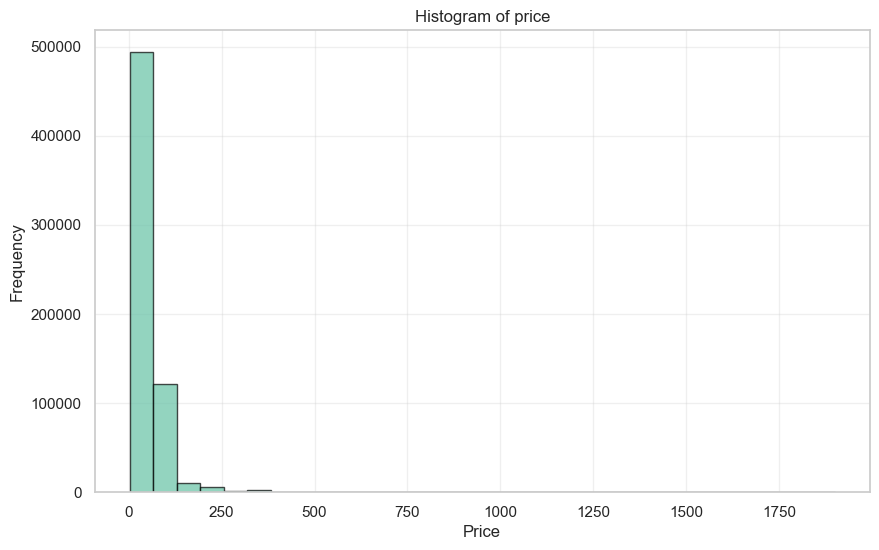

In [102]:
#checking distribution for the variables to select the parameter or non-parameter tests
#Plot histogram for better visulaization of normal distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price_usd_y'], bins=30, edgecolor="black", alpha=0.7)

plt.title("Histogram of price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show() 

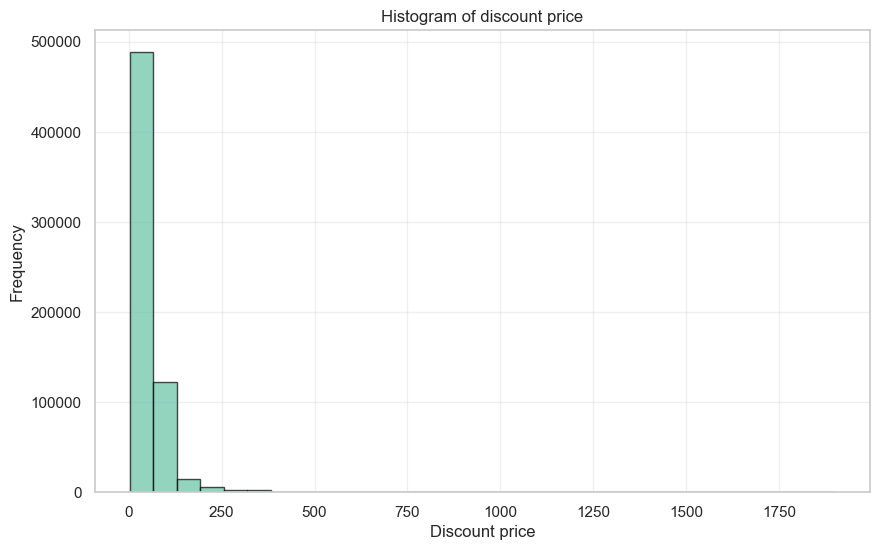

In [103]:
#checking distribution for the variables to select the parameter or non-parameter tests
#Plot histogram for better visulaization of normal distribution
plt.figure(figsize=(10, 6))
plt.hist(df['value_price_usd'], bins=30, edgecolor="black", alpha=0.7)

plt.title("Histogram of discount price")
plt.xlabel("Discount price")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show() 

In [104]:
#dropping nan in pricet
#df_cleaned_price = df.dropna(subset=['value_price_usd', 'price_usd_y'])

# Define the paired samples
value_price_usd = df['value_price_usd']
price_usd = df['price_usd_y']

# Perform the Wilcoxon Signed-Rank Test for non parametric distibution, two sided t test 
statistic, p_value = stats.wilcoxon(value_price_usd, price_usd, alternative='two-sided')

# results
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic:.2f}")
print(f"P-Value: {p_value:.60f}")
print()

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference between the paired samples of price and value price.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference between the paired samples of price and value price.")

Wilcoxon Signed-Rank Test Statistic: 0.00
P-Value: 0.000000000000000000000000000000000000000000000000000000000000

Reject the null hypothesis (H0): There is a significant difference between the paired samples of price and value price.


In [105]:
mean_diff = df["price_usd_y"].mean() - df["value_price_usd"].mean()
print(f"Mean Difference: {mean_diff}")


Mean Difference: -0.5440658351933791


Explanation of Wilcoxon Signed-Rank Test statistic is 0.00, which suggests that the differences between paired samples (price_usd_y and value_price_usd) are all in the same direction (positive or negative). 
It means sum of the ranks for the smaller group is 0, leading to a test statistic of 0.00. 
Another possible reason for that large dataset, the Wilcoxon test might return extremely small values when differences are consistent

### Effect size
Calculting Cohen's d is as measure of effect size that indicates the standardized difference between two means to quantifies the magnitude of the effect

In [108]:
# Calculate the differences
differences_price = price_usd - value_price_usd

# Calculate Cohen's d
mean_diff_price = differences_price.mean()
std_diff_price = differences_price.std(ddof=1)  #'ddof=1' for sample std
cohens_d_price = mean_diff_price / std_diff_price

# Cohen's d
print(f"Cohen's d: {cohens_d_price:.2f}")

# Interpret Cohen's d
if abs(cohens_d_price) < 0.2:
    print("The effect size is small.")
elif abs(cohens_d_price) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cohen's d: -0.12
The effect size is small.


In [109]:
correlation_amount = df[['price_usd_y', 'value_price_usd']].corr(method='pearson')
correlation_amount

price_usd_y  value_price_usd
price_usd_y         1.000000         0.994249
value_price_usd     0.994249         1.000000

The Pearson correlation of (0.994249) suggests a strong positive linear relationship between the original price and value price. As the value price increases, the original price tends to increase as well. 

In [111]:
spearman_correlation_amount = df[['price_usd_y', 'value_price_usd']].corr(method='spearman')
spearman_correlation_amount

price_usd_y  value_price_usd
price_usd_y         1.000000         0.997983
value_price_usd     0.997983         1.000000

The Spearman correlation of (0.997983) indicates a strong positive monotonic relationship between original price and value price. This means that when one variable increases, the other also tends to increase, but not necessarily at a constant rate.

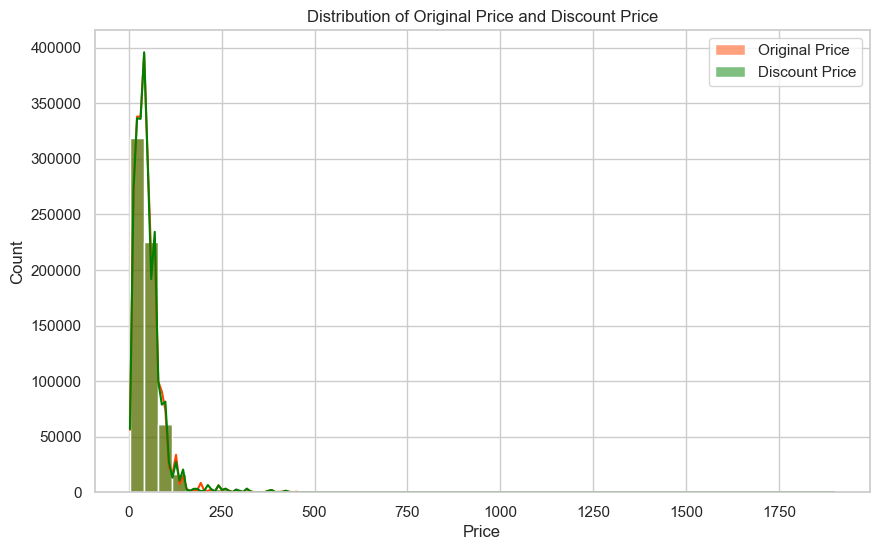

In [113]:
# Plot the distributions original price and discount price
plt.figure(figsize=(10, 6))  
sns.histplot(df["price_usd_y"], color="orangered", bins=50, kde=True, label='Original Price', alpha=0.5)
sns.histplot(df["value_price_usd"], color="green", bins=50, kde=True, label='Discount Price', alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Original Price and Discount Price")
plt.legend() 
plt.show()

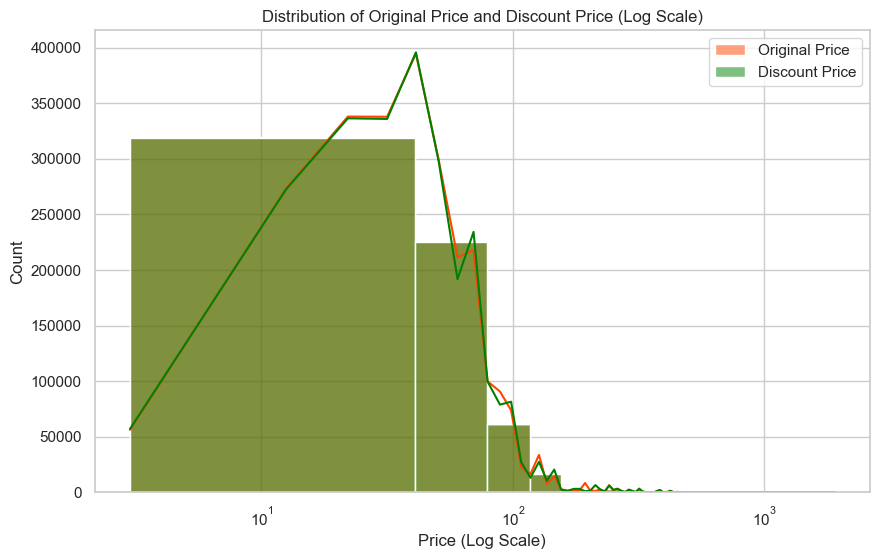

In [114]:
# Plot distribution on a log scale (as Wilcoxon does not consider scale and it calculates absolute difference). 
plt.figure(figsize=(10, 6))
sns.histplot(df["price_usd_y"], color="orangered", bins=50, kde=True, label="Original Price", alpha=0.5)
sns.histplot(df["value_price_usd"], color="green", bins=50, kde=True, label="Discount Price", alpha=0.5)
plt.xscale("log")  # Use log scale to see details in the lower range
plt.xlabel("Price (Log Scale)")
plt.ylabel("Count")
plt.title("Distribution of Original Price and Discount Price (Log Scale)")
plt.legend()
plt.show()

Although the result from Wilcoxon Signed-Rank test statistic shows small p value and statistically significant difference (rank of the prices are consistanly different), the log scale does not show much difference. 
Calculated mean difference between 2 variables, -0.54 is insiginifcant, thus there is not a meaningful difference between prices. 

<h2 style="color: saddlebrown;">Statistical Test - Anova </h2>

<h2 style="color: saddlebrown;">Hypothesis 4 </h2>

**Null hypothesis (H0):** The mean rating is the same across all category.

**Alternative hypothesis (H1):** At least one category has a significantly different mean rating.

In [119]:
# Perform shapiro test to check if rating_y is normally distributed or not to choose Anova one way or Kruskal-Wallis
# Shapiro-Wilk Test
stat, p = shapiro(df['rating_y'])
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-value: {p:.6f}")

# Interpretation
if p > 0.05:
    print("Fail to reject null hypothesis: rating_y is normally distributed.")
else:
    print("Reject null hypothesis: rating_y is NOT normally distributed.")

Shapiro-Wilk Test Statistic: 0.9394, P-value: 0.000000
Reject null hypothesis: rating_y is NOT normally distributed.


In [120]:
# Extract unique categories
categories = df["secondary_category"].unique()

# Create groups for Kruskal-Wallis test (rating_x values for each category)
groups = [df[df["secondary_category"] == cat]["rating_y"] for cat in categories]

# Perform Kruskal-Wallis test
stat, p = kruskal(*groups)

# P value results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.20f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: At least one category has a significantly different median rating_y.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rating_x across categories.")

Kruskal-Wallis Test Statistic: 15381.3321
P-value: 0.00000000000000000000
Reject the null hypothesis: At least one category has a significantly different median rating_y.


#### Effect size

In [122]:
# Calculate effect size for Anova test using Ordinary Least Square (Eta Squared η²)
# Use OLS to fit Anova
model = ols('rating_y ~ C(secondary_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Compute Eta Squared (η²)
SSB = anova_table['sum_sq'][0]  # Sum of Squares Between Groups
SST = sum(anova_table['sum_sq'])  # Total Sum of Squares
eta_squared = SSB / SST

print(f"Eta Squared (η²): {eta_squared:.4f}")

# Interpret Eta Squared
if eta_squared < 0.01:
    print("The effect size is small.")
elif eta_squared < 0.06:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Eta Squared (η²): 0.0296
The effect size is medium.


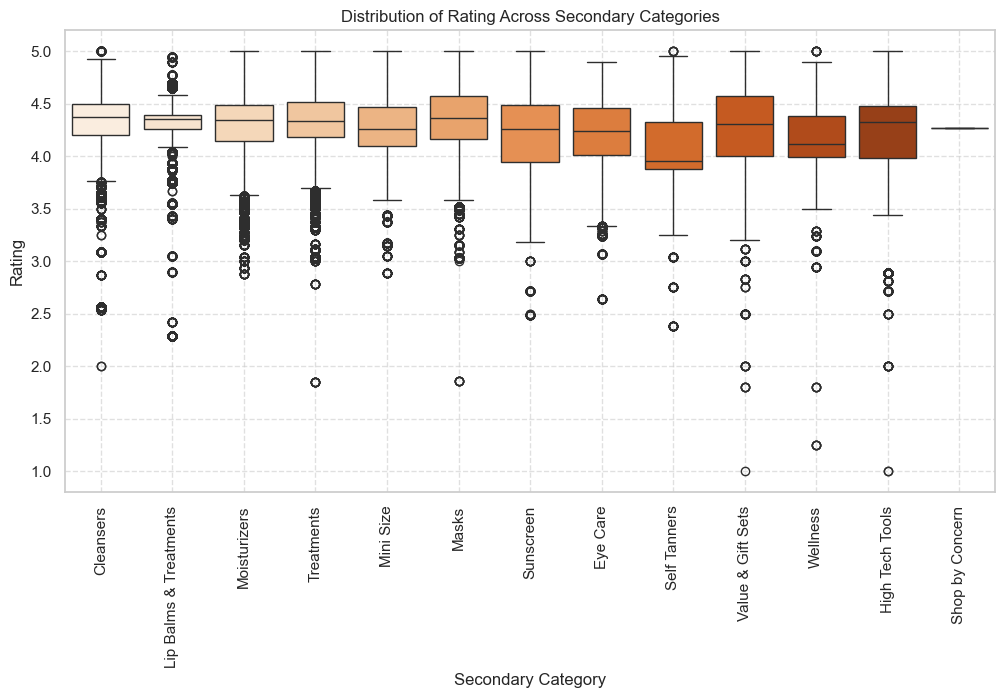

In [123]:
# Create boxplot to visualize rating_y distribution across secondary_category
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["secondary_category"], y=df["rating_y"], palette="Oranges")
plt.title("Distribution of Rating Across Secondary Categories")
plt.xlabel("Secondary Category")
plt.ylabel("Rating")
plt.xticks(rotation=90)  
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Median line is different among at least categories:

self tanner and cleaner

lipbalm and sunscreen 

wellness and moisturizers

<h3 style="color: saddlebrown;">Hypothesis 5</h3>

**Null hypothesis (H0):** The mean price is the same across all skin types.

**Alternative hypothesis (H1):** At least one skin type has a significantly different mean price.

In [127]:
# Extract unique skin types
skin_types = df["skin_type"].unique()

# Create groups for Kruskal-Wallis test
groups = [df[df["skin_type"] == skin]["price_usd_y"] for skin in skin_types]

# Perform Kruskal-Wallis test
stat, p = kruskal(*groups)

# Anova results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.6f}")

# Interpret p value
if p < 0.05:
    print("Reject the null hypothesis: At least one skin type has a significantly different mean price.")
else:
    print("Fail to reject the null hypothesis: No significant difference in price across skin types.")

Kruskal-Wallis Test Statistic: 705.7546
P-value: 0.000000
Reject the null hypothesis: At least one skin type has a significantly different mean price.


#### Effect size 

In [129]:
# Calculate effect size for Anova test using Ordinary Least Square (Eta Squared η²)
# Use OLS to fit Anova
model = ols('rating_y ~ C(secondary_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Compute Eta Squared (η²)
SSB = anova_table['sum_sq'][0]  # Sum of square between groups
SST = sum(anova_table['sum_sq'])  # Total sum squares
eta_squared = SSB / SST

print(f"Eta Squared (η²): {eta_squared:.4f}")

# Interpret Eta Squared
if eta_squared < 0.01:
    print("The effect size is small.")
elif eta_squared < 0.06:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Eta Squared (η²): 0.0296
The effect size is medium.


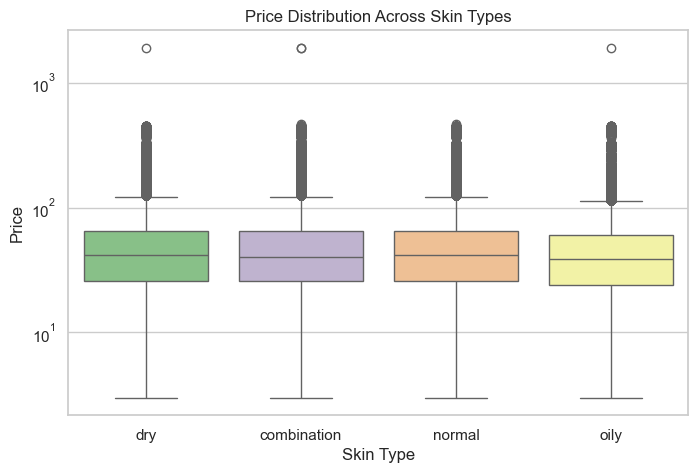

In [130]:
# Visualize price distribution across skin types
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["skin_type"], y=df["price_usd_y"], palette="Accent")  # Using a color palette
plt.title("Price Distribution Across Skin Types")
plt.xlabel("Skin Type")
plt.ylabel("Price")
plt.yscale("log")  # Use log scale for highly skewed prices
plt.show()

In [131]:
#Taking the sample to process machine learning with only 5000 data to increase the spead
df_sample=df.sample(n=5000, random_state=42)

In [132]:
df_sample.shape

(5000, 29)

<h2 style="color: saddlebrown;">X-Y Split</h2>

In [134]:
X = df_sample.drop('is_recommended', axis=1, errors='ignore')
y = df_sample.is_recommended.astype(int) 

<h2 style="color: saddlebrown;">Normalizing the Data</h2>

In [136]:
# Define features and target variables
y = df_sample['is_recommended'].astype(int)  # Target variable
X = df_sample.drop(columns=['is_recommended'], errors='ignore')  # Features

In [137]:
# Extract Variable Types, split data
cat = X.select_dtypes(exclude=["number","object"])  # Only categorical, No text
num = X.select_dtypes(include="number")  # Numeric variables
text = X.select_dtypes(include="object")  # separate text before encoding

In [138]:
# Convert Some Numerical Columns to Categorical 
cat_from_num = num.loc[:, (num.nunique() > 2) & (num.nunique() < 20)] 
cat = pd.concat([cat, cat_from_num], axis=1)  
num = num.drop(columns=cat_from_num.columns) 

In [139]:
# Split numerical values to binary and non_binary (as float type) and then ones that require scaling and the rest keep it as is
# Normalize skewed numerical features using log transformation
skewed_features = ['reviews', 'sale_price_usd', 'total_pos_feedback_count']
# Apply log transformation
X[skewed_features] = X[skewed_features].apply(lambda x: np.log1p(x))
log_transformed_df = X[skewed_features]
# Remove them from X before scaling
X = X.drop(columns=skewed_features)

In [140]:
# Define numerical columns (excluding the log-transformed ones)
number_columns = ['helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 
                  'loves_count', 'rating_y', 'price_usd_y', 'value_price_usd']
number_df = X[number_columns].astype(float)
# Normalize Numerical Variables (float type)
scaler = StandardScaler()
num_scaled = scaler.fit_transform(X[number_columns])  # Scale only floats

In [141]:
# Define Binary variables (not to define them as categorical) but binary numerical for better encoding (avoid dimensionality)
binary_columns = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']
binary_df = X[binary_columns].astype(int)  # Convert binary variables to int
X = X.drop(columns=binary_columns, errors='ignore')  # Remove binary from X to prevent duplicates

In [142]:
# Normalize categorical variable (rating_x) with Frequency Encoding instead of on hot encoded to aviod dimensionality
for col in cat.columns:
    cat[col] = cat[col].map(cat[col].value_counts(normalize=True))

In [143]:
#Handeling text columns with 4 different methods 

# Remove Text Columns 
text_features = text[['review_text', 'review_title']]  # Save text columns separately
X = X.drop(columns=['review_text', 'review_title'], errors='ignore')  # Drop them from X

#  Handle Text Features (review_text and review_title) with sentiment polarity and subjectivity to capture sentiment
df_sample['review_sentiment'] = text_features['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df_sample['review_subjectivity'] = text_features['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_sample['review_title_sentiment'] = text_features['review_title'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df_sample['review_title_subjectivity'] = text_features['review_title'].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Select categorical columns for ordinal encoding
ordinal_features = ['skin_tone', 'eye_color', 'hair_color', 'skin_type']
ordinal_encoder = OrdinalEncoder()


# Target encoding for categorical features with high unique values
target_features = ['brand_name_x', 'product_name_x']
target_encoder = ce.TargetEncoder(cols=target_features)
target_encoded_df = target_encoder.fit_transform(X[target_features], y)

# Label encoding for simple features
label_features = ['variation_type', 'variation_desc']
label_encoded_df = X[label_features].apply(LabelEncoder().fit_transform)

In [144]:
# define all normalized features into dataframe
num_scaled_df = pd.DataFrame(num_scaled, columns=number_columns, index=df_sample.index)
binary_df = pd.DataFrame(binary_df, columns=binary_columns, index=df_sample.index)
cat_encoded_df = pd.DataFrame(cat, columns=cat.columns, index=df_sample.index)
sentiment_df = df_sample[['review_sentiment', 'review_subjectivity', 'review_title_sentiment','review_title_subjectivity']]
ordinal_encoded_df = pd.DataFrame(ordinal_encoder.fit_transform(X[ordinal_features]), columns=ordinal_features, index=X.index)
tex_df_encoded = pd.concat([ordinal_encoded_df, target_encoded_df, label_encoded_df, sentiment_df], axis=1)
is_recommended_df = pd.DataFrame(df_sample.is_recommended, columns=['is_recommended']) #add back is_recommended to the new dataframe

In [145]:
# combine all features to the final dataframe for ML
df_combined = pd.concat([num_scaled_df, cat_encoded_df, sentiment_df, tex_df_encoded, binary_df,is_recommended_df], axis=1)

In [146]:
df_combined.head()

helpfulness  total_feedback_count  total_neg_feedback_count  \
696677     0.243041             -0.039029                  0.195739   
676717     1.212752              0.693597                 -0.006304   
120138    -0.875858             -0.105631                  0.397782   
426032    -0.875858             -0.305438                 -0.208347   
436513    -0.875858             -0.305438                 -0.208347   

        loves_count  rating_y  price_usd_y  value_price_usd  rating_x  \
696677    -0.192220 -1.531836     0.336056         0.318637    0.1664   
676717    -0.227603 -0.151271     0.549250         0.527879    0.6490   
120138    -0.001447  1.408148    -0.777291        -0.774072    0.6490   
426032     0.179957  0.548890    -0.421968        -0.425335    0.6490   
436513    -0.548537  0.206435     0.501874         0.481381    0.6490   

        review_sentiment  review_subjectivity  review_title_sentiment  \
696677          0.127500             0.375833                     0.2   
676717          0.063787             0.400996                     0.0   
120138          0.158618             0.459615                     0.0   
426032          0.300694             0.635577                     0.0   
436513          0.437500             0.662500                     0.0   

        review_title_subjectivity  skin_tone  eye_color  hair_color  \
696677                        0.3        4.0        2.0         3.0   
676717                        0.0        2.0        5.0         6.0   
120138                        0.0        2.0        5.0         3.0   
426032                        0.1        4.0        4.0         2.0   
436513                        0.0        4.0        5.0         6.0   

        skin_type  brand_name_x  product_name_x  variation_type  \
696677        0.0      0.820313        0.838171               2   
676717        0.0      0.778216        0.776981               2   
120138        0.0      0.935481        0.883090               2   
426032        2.0      0.881657        0.868766               2   
436513        3.0      0.903178        0.881271               2   

        variation_desc  review_sentiment  review_subjectivity  \
696677               6          0.127500             0.375833   
676717               6          0.063787             0.400996   
120138               6          0.158618             0.459615   
426032               6          0.300694             0.635577   
436513               6          0.437500             0.662500   

        review_title_sentiment  review_title_subjectivity  limited_edition  \
696677                     0.2                        0.3                0   
676717                     0.0                        0.0                0   
120138                     0.0                        0.0                0   
426032                     0.0                        0.1                0   
436513                     0.0                        0.0                0   

        new  online_only  out_of_stock  sephora_exclusive  is_recommended  
696677    0            0             0                  0             1.0  
676717    0            0             0                  1             1.0  
120138    0            0             0                  0             1.0  
426032    0            0             0                  1             1.0  
436513    0            0             0                  0             1.0

In [147]:
df_combined.shape

(5000, 30)

<h2 style="color: saddlebrown;">Preprocessing - Feature importance with Random Forest Classifier</h2>

In [149]:
# Remove is_recommened from df_combined to make training
X = df_combined.drop("is_recommended", axis=1)  
y = df_combined["is_recommended"].astype(int)

<h2 style="color: saddlebrown;">Train-Test Split</h2>

In [151]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Ensure column names are strings
X_train.columns = X_train.columns.map(str)

# Verify column drop
print("is_recommended" in X_train.columns)  # assure is_recommened is dropped, should return fales
print(X_train.columns)  # check features

False
Index(['helpfulness', 'total_feedback_count', 'total_neg_feedback_count',
       'loves_count', 'rating_y', 'price_usd_y', 'value_price_usd', 'rating_x',
       'review_sentiment', 'review_subjectivity', 'review_title_sentiment',
       'review_title_subjectivity', 'skin_tone', 'eye_color', 'hair_color',
       'skin_type', 'brand_name_x', 'product_name_x', 'variation_type',
       'variation_desc', 'review_sentiment', 'review_subjectivity',
       'review_title_sentiment', 'review_title_subjectivity',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive'],
      dtype='object')


In [153]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<h3 style="color: saddlebrown;">Model Validation</h3>

In [155]:
predictions = model.predict(X_test)

In [156]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       159
           1       0.99      0.98      0.98       841

    accuracy                           0.97      1000
   macro avg       0.94      0.96      0.95      1000
weighted avg       0.97      0.97      0.97      1000



<h2 style="color: saddlebrown;">Feature Importance</h2>

In [158]:
#checking which features has the most importance or contributing the most to the predictions using random forest 
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order
#Get the top N available features (Min between 20 or total available features)
num_features = min(20, len(indices))
top_indices = indices[:num_features]

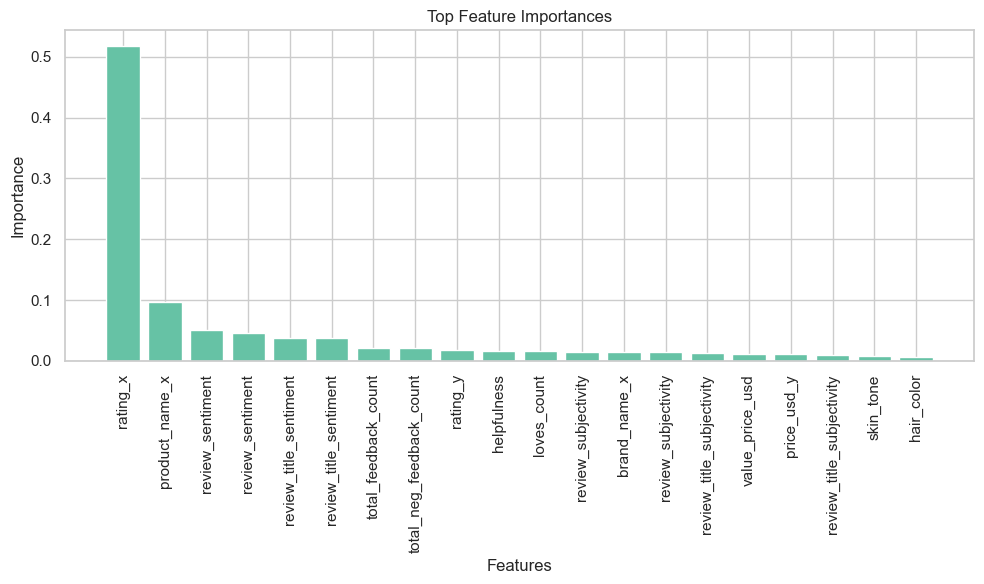

In [159]:
# Create bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(num_features), importances[top_indices], align="center")
plt.xticks(range(num_features), [feature_names[i] for i in top_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

**Selecting feature for training based on feature importance and multiculiniarity between features**

**multiculiniarity between featurtes:**

price_usd_y and value_price_usd 0.99  --> keep sales_price

price_use_y and sales_price_usd 1.00

value_price_usd and sales_price_usd 0.99

total_feedback_count and total_pos_feedback_count 0.98  --> keep total__pos_feedback_count

reviews and love_count 0.82  --> keep review

total_neg_feeback_count and rating_x -0.19  --> keep rating_x

sephora exclusive and price_usd_x -0.19

sephora exclusive and price_usd_y -0.19

sephora exclusive and value_price_usd -0.18

sephora exclusive and sales_price_usd -0.19

love_count and price_usd_y -0.17 --> keep loves_count (capture review count)

love_count and sales_price_usd -0.17

love_count and online_only -0.17  --> online_only

love_count and value_price_usd -0.16

rating_y and helpfulness -0.17  --> rating_y

==================================================================================================================
**Featurte importance**

-skin_tone, rating_y, total_neg_feedback_count, total_feedback_count, helpfulness, total_pos_feedback_count, hair_color, skin_type, eye_color, love_count, reviews, rating_x, sales_price_usd, value_price_usd, usd_price_y, brand_name_x, secondry_category, sephora_exclusive, online_only

**feature selection:**
Dropping the features with high correlation among features only (as including features with higher contribution (feature importance) would increase overfitting the models thus they are excluded)

**Features selected:** `skin_tone`, `rating_y` ,`total_pos_feedback_count`, `loves_count`, `hair_color`, `skin_type`, `eye_color`, `reviews`, `rating_x`, `sales_price_usd`,`brand_name_x`, `product_name`,`secondry_category`, `variation_type`, `variation_desc`,`online_only`,`out_of_stock`, `new`, `limited_edition`



<h2 style="color: saddlebrown;">X-y split</h2>

In [162]:
X = df_combined.drop(['is_recommended','helpfulness','total_feedback_count', 'total_neg_feedback_count','value_price_usd',
                     'price_usd_y','sephora_exclusive'], axis=1) 
y = df_combined.is_recommended

In [163]:
X.head(3)

loves_count  rating_y  rating_x  review_sentiment  \
696677    -0.192220 -1.531836    0.1664          0.127500   
676717    -0.227603 -0.151271    0.6490          0.063787   
120138    -0.001447  1.408148    0.6490          0.158618   

        review_subjectivity  review_title_sentiment  \
696677             0.375833                     0.2   
676717             0.400996                     0.0   
120138             0.459615                     0.0   

        review_title_subjectivity  skin_tone  eye_color  hair_color  \
696677                        0.3        4.0        2.0         3.0   
676717                        0.0        2.0        5.0         6.0   
120138                        0.0        2.0        5.0         3.0   

        skin_type  brand_name_x  product_name_x  variation_type  \
696677        0.0      0.820313        0.838171               2   
676717        0.0      0.778216        0.776981               2   
120138        0.0      0.935481        0.883090               2   

        variation_desc  review_sentiment  review_subjectivity  \
696677               6          0.127500             0.375833   
676717               6          0.063787             0.400996   
120138               6          0.158618             0.459615   

        review_title_sentiment  review_title_subjectivity  limited_edition  \
696677                     0.2                        0.3                0   
676717                     0.0                        0.0                0   
120138                     0.0                        0.0                0   

        new  online_only  out_of_stock  
696677    0            0             0  
676717    0            0             0  
120138    0            0             0

In [164]:
X.shape

(5000, 23)

<h2 style="color: saddlebrown;">Train-test split</h2>

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2 style="color: saddlebrown;">Model Selection: Logistic Regression</h2>

In [168]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h2 style="color: saddlebrown;">Model Validation</h2>

In [170]:
predictions = model.predict(X_test)

In [171]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 1500.


<h3 style="color: saddlebrown;">Metrics</h3>

In [173]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       243
         1.0       0.97      0.96      0.97      1257

    accuracy                           0.94      1500
   macro avg       0.89      0.91      0.90      1500
weighted avg       0.95      0.94      0.95      1500



In [174]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9446666666666667
Train data accuracy:  0.9574285714285714


<h3 style="color: saddlebrown;">Confusion matrix</h3>

<Figure size 600x400 with 0 Axes>

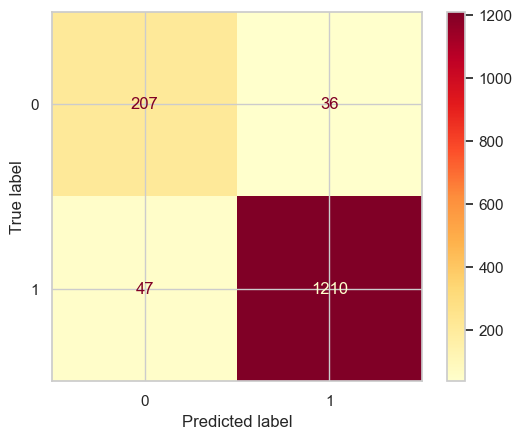

In [176]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='YlOrRd')  
plt.grid(True)
plt.show()

<h2 style="color: saddlebrown;">Selecting the Model: Decision Trees </h2>

In [178]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

<h3 style="color: saddlebrown;">Metrics</h3>

In [180]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       243
         1.0       0.99      0.98      0.98      1257

    accuracy                           0.97      1500
   macro avg       0.94      0.97      0.95      1500
weighted avg       0.98      0.97      0.98      1500



In [181]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9746666666666667
Train data accuracy:  0.9757142857142858


<h3 style="color: saddlebrown;">Confusion matrix</h3>

<Figure size 600x400 with 0 Axes>

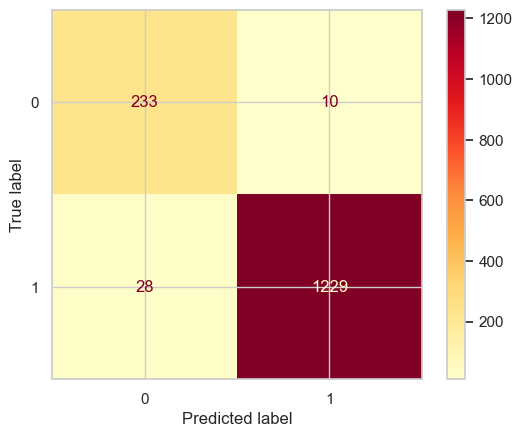

In [183]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='YlOrRd')  
plt.grid(True)
plt.show()

In [184]:
#using different values for the max_depth parameter to train the model
model = DecisionTreeClassifier()
max_depth = range(1, 30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train, y_train))

In [185]:
#Accuracy
accuracy = accuracy_score(y_test, y_test)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 1.0000

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       243
         1.0       0.99      0.98      0.98      1257

    accuracy                           0.97      1500
   macro avg       0.94      0.97      0.95      1500
weighted avg       0.98      0.97      0.98      1500



In [186]:
#Plot trainig and testing accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(max_depth), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(max_depth), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Tree Depth', title='')
fig.show()

In [187]:
# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated scores for Decision Tree:", dt_cv_scores)
print("Mean cross-validation accuracy:", dt_cv_scores.mean())

Cross-validated scores for Decision Tree: [0.96714286 0.96142857 0.96571429 0.96142857 0.95285714]
Mean cross-validation accuracy: 0.9617142857142855


<h2 style="color: saddlebrown;">Selecting the model- Random Forest</h2>

In [189]:
#Improving Decision tree model with Random forest
# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # More trees can increase stability
    max_depth=3,  # limit the depth to prevent individual trees from overfitting
    bootstrap=True,  # to reduce the variance
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

#classification report
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validated scores for Random Forest:", rf_cv_scores)

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       243
         1.0       0.97      0.99      0.98      1257

    accuracy                           0.96      1500
   macro avg       0.94      0.90      0.92      1500
weighted avg       0.96      0.96      0.96      1500

Cross-validated scores for Random Forest: [0.96285714 0.97       0.96428571 0.95142857 0.96428571]


<h2 style="color: saddlebrown;">Selecting the model - XGBoost</h2>

In [191]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure X_train is a DataFrame and y_train is a Series
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train).astype(float)
X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test).astype(float)

# Convert to NumPy array before using XGBoost DMatrix
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
dtest = xgb.DMatrix(X_test.values, label=y_test.values)

# Define parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'eta': 0.1,  # Learning rate
    'max_depth': 3  # Depth of each tree
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict test data
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.976

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       243
         1.0       0.99      0.98      0.99      1257

    accuracy                           0.98      1500
   macro avg       0.95      0.96      0.96      1500
weighted avg       0.98      0.98      0.98      1500



<h2 style="color: saddlebrown;">Selecting the Model: Support Vector Classification</h2>

In [193]:
#Selecting the Model: Support Vector Classification
model = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 0.9707

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       243
         1.0       0.99      0.97      0.98      1257

    accuracy                           0.97      1500
   macro avg       0.93      0.96      0.95      1500
weighted avg       0.97      0.97      0.97      1500



In [194]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9706666666666667
Train data accuracy:  0.9725714285714285


<h3 style="color: saddlebrown;">Confusion Matrix</h3>

<Figure size 800x600 with 0 Axes>

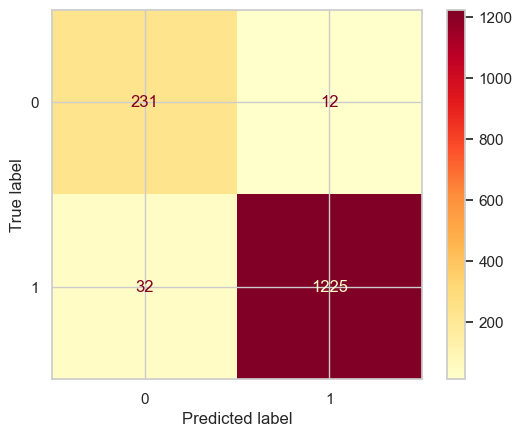

In [196]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='YlOrRd')  
plt.grid(True)
plt.show()

In [197]:

# Create a dictionary to store the results of machine learning
results = {
    "Model": ["Decision Tree", "Logistic Regression", "Random Forest", "SVM", "XGBoost"],
    "Test Accuracy": [0.9746, 0.9446, 0.9628, 0.9708, 0.9685], 
    "Train Accuracy": [0.9757, 0.9574, 0.9643, 0.9725, 0.9732],
    "Precision (0)": [0.89, 0.81, 0.92, 0.88, 0.91],
    "Recall (0)": [0.96, 0.85, 0.82, 0.95, 0.90],
    "F1-score (0)": [0.92, 0.83, 0.87, 0.91, 0.90],
    "Precision (1)": [0.99, 0.97, 0.97, 0.99, 0.98],
    "Recall (1)": [0.98, 0.96, 0.99, 0.97, 0.98],
    "F1-score (1)": [0.98, 0.95, 0.98, 0.97, 0.98],
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
display(results_df)


Model  Test Accuracy  Train Accuracy  Precision (0)  \
0        Decision Tree         0.9746          0.9757           0.89   
1  Logistic Regression         0.9446          0.9574           0.81   
2        Random Forest         0.9628          0.9643           0.92   
3                  SVM         0.9708          0.9725           0.88   
4              XGBoost         0.9685          0.9732           0.91   

   Recall (0)  F1-score (0)  Precision (1)  Recall (1)  F1-score (1)  
0        0.96          0.92           0.99        0.98          0.98  
1        0.85          0.83           0.97        0.96          0.95  
2        0.82          0.87           0.97        0.99          0.98  
3        0.95          0.91           0.99        0.97          0.97  
4        0.90          0.90           0.98        0.98          0.98

<h2 style="color: saddlebrown;">Imbalance Data</h2>

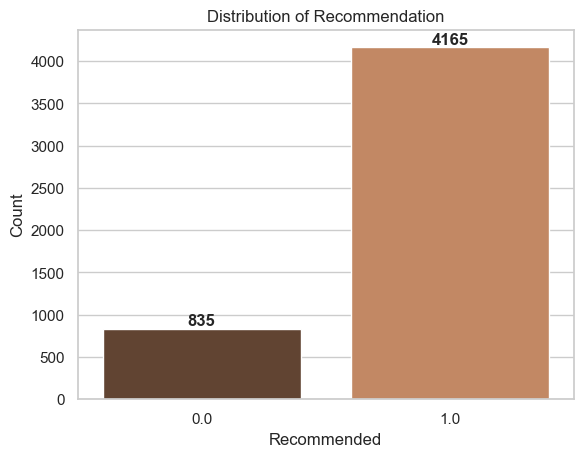

In [199]:
# plot distribution of is_recommended
sns.set(style='whitegrid', palette='Spectral')
ax = sns.countplot(data=df_combined, x="is_recommended", palette="copper")
for p in ax.patches: # Add the values on top of the bars
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.title("Distribution of Recommendation")
plt.show()

<h3 style="color: saddlebrown;">Preprocessing</h3>

In [201]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# concatenate X_train and y_train to handle resampling together
train = pd.concat([X_train, y_train], axis=1)

In [202]:
not_recommended = train[train['is_recommended']==0]
recommended = train[train['is_recommended']==1]

In [203]:
display(not_recommended.shape)
display(recommended.shape)

(592, 24)

(2908, 24)

In [204]:
sampled_recommended = resample(recommended,
                                replace=True,  # Sample with replacement
                                n_samples=len(not_recommended),  # Match number in majority class
                                random_state=42)  # Reproducible results

In [205]:
display(not_recommended.shape)
display(recommended.shape)

(592, 24)

(2908, 24)

In [206]:
train_sampled = pd.concat([not_recommended,sampled_recommended])
train_sampled.sample(10)

loves_count  rating_y  rating_x  review_sentiment  \
311020    -0.260400  1.144721    0.6490          0.590000   
175657     0.855132  0.168308    0.0634         -0.100000   
911268    -0.293071 -0.673272    0.0700          0.167222   
239982    -0.556028  0.201929    0.0512          0.277778   
162617     1.446931 -0.919368    0.1664          0.256250   
510521     0.075542 -1.880183    0.0634          0.333333   
168378    -0.476035 -0.919368    0.6490          0.800000   
758767    -0.338707 -1.029245    0.0634          0.112500   
280534     0.124985  1.867065    0.6490         -0.036111   
648448    -0.497282 -0.029609    0.0700          0.335000   

        review_subjectivity  review_title_sentiment  \
311020             0.710000                0.700000   
175657             0.400000                0.000000   
911268             0.708333                0.200000   
239982             0.355556                0.000000   
162617             0.362500                0.477778   
510521             0.500000                0.000000   
168378             0.750000                1.000000   
758767             0.225000                0.000000   
280534             0.129487                0.625000   
648448             0.366667                0.000000   

        review_title_subjectivity  skin_tone  eye_color  hair_color  \
311020                   0.600000        4.0        5.0         3.0   
175657                   0.000000       11.0        2.0         3.0   
911268                   0.300000        2.0        1.0         6.0   
239982                   0.000000        6.0        5.0         3.0   
162617                   0.616667        7.0        2.0         3.0   
510521                   0.500000        6.0        2.0         1.0   
168378                   1.000000        5.0        2.0         1.0   
758767                   0.000000        4.0        2.0         1.0   
280534                   0.600000        5.0        5.0         2.0   
648448                   0.000000        4.0        1.0         2.0   

        skin_type  brand_name_x  product_name_x  variation_type  \
311020        0.0      0.869163        0.912328               2   
175657        1.0      0.802743        0.774609               5   
911268        3.0      0.803937        0.833066               5   
239982        0.0      0.906872        0.878980               2   
162617        0.0      0.812766        0.858159               2   
510521        0.0      0.754717        0.784853               2   
168378        0.0      0.812766        0.783309               2   
758767        0.0      0.881657        0.826980               2   
280534        1.0      0.954933        0.871656               2   
648448        0.0      0.754717        0.846958               2   

        variation_desc  review_sentiment  review_subjectivity  \
311020               6          0.590000             0.710000   
175657               6         -0.100000             0.400000   
911268               6          0.167222             0.708333   
239982               6          0.277778             0.355556   
162617               6          0.256250             0.362500   
510521               6          0.333333             0.500000   
168378               6          0.800000             0.750000   
758767               6          0.112500             0.225000   
280534               6         -0.036111             0.129487   
648448               6          0.335000             0.366667   

        review_title_sentiment  review_title_subjectivity  limited_edition  \
311020                0.700000                   0.600000                0   
175657                0.000000                   0.000000                0   
911268                0.200000                   0.300000                0   
239982                0.000000                   0.000000                0   
162617                0.477778                   0.616667                0   
510521                0.00

In [207]:
X_train = train_sampled.drop('is_recommended',axis = 1)
y_train = train_sampled['is_recommended']

In [208]:
#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [209]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [210]:
#Metric
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
print(classification_report(y_test, predictions))

Accuracy: 0.9640

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       243
         1.0       0.99      0.97      0.98      1257

    accuracy                           0.96      1500
   macro avg       0.92      0.96      0.94      1500
weighted avg       0.97      0.96      0.96      1500



In [211]:
predictions = model.predict(X_test)

In [212]:
#Metric
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
print(classification_report(y_test, predictions))

Accuracy: 0.9640

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       243
         1.0       0.99      0.97      0.98      1257

    accuracy                           0.96      1500
   macro avg       0.92      0.96      0.94      1500
weighted avg       0.97      0.96      0.96      1500



<h3 style="color: saddlebrown;">Oversampling with SMOTE</h3>

In [214]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# train-test split with re-sampled 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, stratify=y_sm, random_state=42)

In [215]:
y.value_counts()

is_recommended
1.0    4165
0.0     835
Name: count, dtype: int64

In [216]:
y_sm.value_counts()

is_recommended
1.0    4165
0.0    4165
Name: count, dtype: int64

In [217]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [218]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [219]:
#Metric
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1250
         1.0       0.99      0.91      0.95      1249

    accuracy                           0.95      2499
   macro avg       0.95      0.95      0.95      2499
weighted avg       0.95      0.95      0.95      2499



In [220]:
#Decision Tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [221]:
predictions = model.predict(X_test)

In [222]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1250
         1.0       0.98      0.99      0.99      1249

    accuracy                           0.99      2499
   macro avg       0.99      0.99      0.99      2499
weighted avg       0.99      0.99      0.99      2499



In [223]:
# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # More trees can increase stability
    max_depth=3,  # limit the depth to prevent individual trees from overfitting
    bootstrap=True,  # to reduce the variance
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

#classification report
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1250
         1.0       0.99      0.97      0.98      1249

    accuracy                           0.98      2499
   macro avg       0.98      0.98      0.98      2499
weighted avg       0.98      0.98      0.98      2499



In [224]:
#XGBoost
# Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure X_train is a DataFrame and y_train is a Series
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train).astype(float)
X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test).astype(float)

# Convert to NumPy array before using XGBoost DMatrix
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
dtest = xgb.DMatrix(X_test.values, label=y_test.values)

# Define parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'eta': 0.1,  # Learning rate
    'max_depth': 3  # Depth of each tree
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict test data
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.988795518207283

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1250
         1.0       0.99      0.99      0.99      1249

    accuracy                           0.99      2499
   macro avg       0.99      0.99      0.99      2499
weighted avg       0.99      0.99      0.99      2499



In [225]:
#Selecting the Model: Support Vector Classification
model = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 0.9712

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1250
         1.0       0.99      0.96      0.97      1249

    accuracy                           0.97      2499
   macro avg       0.97      0.97      0.97      2499
weighted avg       0.97      0.97      0.97      2499



<h3 style="color: saddlebrown;">Undersampling with TomeLinks</h3>

In [227]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=42)

In [228]:
y.value_counts()

is_recommended
1.0    4165
0.0     835
Name: count, dtype: int64

In [229]:
y_tl.value_counts()

is_recommended
1.0    3998
0.0     835
Name: count, dtype: int64

In [230]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [231]:
predictions = model.predict(X_test)

In [232]:
# model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 0.9510

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       257
         1.0       0.97      0.97      0.97      1193

    accuracy                           0.95      1450
   macro avg       0.92      0.91      0.91      1450
weighted avg       0.95      0.95      0.95      1450



In [233]:
#Decision Tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [234]:
# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # More trees can increase stability
    max_depth=3,  # limit the depth to prevent individual trees from overfitting
    bootstrap=True,  # to reduce the variance
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

#classification report
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87       257
         1.0       0.96      0.99      0.98      1193

    accuracy                           0.96      1450
   macro avg       0.96      0.90      0.93      1450
weighted avg       0.96      0.96      0.96      1450



In [235]:
#XGBoost
# Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure X_train is a DataFrame and y_train is a Series
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train).astype(float)
X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test).astype(float)

# Convert to NumPy array before using XGBoost DMatrix
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
dtest = xgb.DMatrix(X_test.values, label=y_test.values)

# Define parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'eta': 0.1,  # Learning rate
    'max_depth': 3  # Depth of each tree
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict test data
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.976551724137931

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       257
         1.0       0.98      0.99      0.99      1193

    accuracy                           0.98      1450
   macro avg       0.96      0.96      0.96      1450
weighted avg       0.98      0.98      0.98      1450



In [236]:
#Selecting the Model: Support Vector Classification
model = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 0.9683

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       257
         1.0       0.98      0.98      0.98      1193

    accuracy                           0.97      1450
   macro avg       0.94      0.95      0.95      1450
weighted avg       0.97      0.97      0.97      1450



<h1 style="color: sandybrown;">07 | Natural Language Processing</h1>

In [238]:
df=pd.read_csv("sephora_cleaned.csv")

In [239]:
df.sample(3)

rating_x  helpfulness  total_feedback_count  total_neg_feedback_count  \
507687         2          1.0                     2                         0   
292622         3          0.0                     0                         0   
39568          5          0.0                     0                         0   

        total_pos_feedback_count  \
507687                         2   
292622                         0   
39568                          0   

                                              review_text  \
507687  Didn’t work for me- used this for about 3 mont...   
292622  I liked it at first, felt very moisturizing, f...   
39568   Whoa. I think this cleanser is actually doing ...   

               review_title  skin_tone eye_color    skin_type hair_color  \
507687                   No  mediumTan     brown          dry      brown   
292622  Caused breakouts...     medium     brown          dry      black   
39568                 Whoa.      light     hazel  combination      brown   

                           product_name_x         brand_name_x  loves_count  \
507687  Pore Remedy PHA Exfoliating Serum            Dr. Jart+        17936   
292622   Mini Crème de la Mer Moisturizer               La Mer        18102   
39568      Superfood Antioxidant Cleanser  Youth To The People       404142   

        rating_y  reviews variation_type  variation_desc  price_usd_y  \
507687    4.1694    431.0           Size  no description         45.0   
292622    4.0566   1377.0           Size  no description        100.0   
39568     4.2112   5851.0           Size  no description         39.0   

        value_price_usd  sale_price_usd  limited_edition  new  online_only  \
507687             45.0            45.0                0    0            0   
292622            100.0           100.0                0    0            0   
39568              39.0            39.0                0    0            0   

        out_of_stock  sephora_exclusive  \
507687             0                  1   
292622             0                  0   
39568              0                  0   

                                               highlights secondary_category  \
507687  ['Good for: Pores', 'Good for: Dullness/Uneven...         Treatments   
292622  ['Best for Dry Skin', 'Good for: Dryness', 'Wi...          Mini Size   
39568   ['Vegan', 'Refill Available', 'Good for: Pores...          Cleansers   

        is_recommended  
507687             0.0  
292622             0.0  
39568              1.0

In [240]:
#Taking the sample to process machine learning with only 5000 data to increase the spead
df_nlp=df.sample(n=1000, random_state=42)

<h3 style="color: saddlebrown;">Feature selection</h3>

From the dataframe `df`, interested in the following columns:

- **`review_text`**: The most important variable in natural language process. These texts will be broken down into tokens and processed to determine their sentiment.
- **`review_title`**: Provides a brief overview of the review.
- **`highlights`**: Provides a brief overview unique selling points/features of the product's attributes that could resulted in recommendation of the product.
- **`is_recommended`**: Project goal to check whether the consumer recommend Sephora articles. Useful for comparing our sentiment analysis results.
- **`loves_count`**:  number of people who add this product in their favorite, Useful for comparing to is_recommended.
- **`total_feebdack_count`**: Total number of feedback left by users for a review.



In [243]:
dfr=df_nlp[["review_text","review_title", "highlights","rating_x","is_recommended", "loves_count","total_feedback_count"]]

<h3 style="color: saddlebrown;">Sentiment analysis - VADER</h3>

In [245]:
#  Use SentimentIntensityAnalyzer (VADER lexicon) to analyze the sentiment of the text
# vd object will use VADER and SentimentIntensityAnalyzer to analyze the sentiment of the text
vd = SentimentIntensityAnalyzer()

In [246]:
dfr.reset_index(drop=True, inplace=True)

In [247]:
# Perform Iterate using iterrows for all text:
text_scores = {}
vader_df = pd.DataFrame()

for _, row in dfr.iterrows():
    text = row["review_text"] # get text data
    polarity = vd.polarity_scores(text) # get polarity scores
    vd_df = pd.DataFrame([polarity]) # make a df from polarity dict
    vader_df = pd.concat([vader_df, vd_df], ignore_index=True) # concat to vader_df

In [248]:
# Dataframe including sentiment analysis of vader
data_vaders = pd.concat([dfr, vader_df], axis=1)  
data_vaders

review_text  \
0    I really enjoyed Kiehl’s Clearly Corrective Da...   
1    I waited three months to leave my review for t...   
2    This is the coolest exfoliator I’ve ever used!...   
3    Received a sample size of this in an Influenst...   
4    I received this as a sample from influencer an...   
..                                                 ...   
995  I have only used this one day. So far I like i...   
996  This is a nice basic cleanser. It left my skin...   
997  It is perfect and worth the splurge. It is sup...   
998  I’ve been pleasantly surprised with dr. Barbar...   
999  I have a love/hate relationship with this prod...   

                        review_title  \
0                  Very moisturizing   
1    YES to oil for acne prone skin!   
2                            Woah!!!   
3                     Solid af toner   
4                 Received as sample   
..                               ...   
995                             Good   
996                    good cleanser   
997                     LOVE IT ❤️❤️   
998                            Love!   
999                  Plump...pimples   

                                            highlights  rating_x  \
0    ['Good for: Dullness/Uneven Texture', 'Vitamin...         4   
1    ['Good for: Acne/Blemishes', 'Good for: Rednes...         5   
2    ['Vegan', 'Good for: Dullness/Uneven Texture',...         5   
3    ['Hydrating', 'Best for Dry Skin', 'Hypoallerg...         5   
4    ['Hyaluronic Acid', 'Good for: Dark Circles', ...         5   
..                                                 ...       ...   
995  ['allure 2019 Best of Beauty Award Winner', 'C...         4   
996  ['Good for: Redness', 'Clean at Sephora', 'Goo...         3   
997  ['High Shine Finish', 'Community Favorite', 'H...         5   
998  ['Good for: Dark Circles', 'Good for: Dullness...         5   
999  ['Clean at Sephora', 'Hydrating', 'Plumping', ...         3   

     is_recommended  loves_count  total_feedback_count    neg    neu    pos  \
0               1.0        75403                     4  0.036  0.698  0.265   
1               1.0        68960                    15  0.014  0.925  0.061   
2               1.0       110141                     3  0.000  0.810  0.190   
3               1.0       143173                     0  0.048  0.647  0.305   
4               1.0        10521                     0  0.000  0.639  0.361   
..              ...          ...                   ...    ...    ...    ...   
995             1.0         9381                     0  0.067  0.886  0.047   
996             1.0        38097                     0  0.075  0.629  0.296   
997             1.0       471406                     0  0.000  0.489  0.511   
998             1.0         8905                     1  0.063  0.665  0.272   
999             0.0       202204                     2  0.000  0.894  0.106   

     compound  
0      0.9332  
1      0.8964  
2      0.9244  
3      0.9744  
4      0.9272  
..        ...  
995   -0.2134  
996    0.7748  
997    0.9682  
998    0.9675  
999    0.7964  

[1000 rows x 11 columns]

<h3 style="color: saddlebrown;">Distribution of ratings per sentiment type</h3>

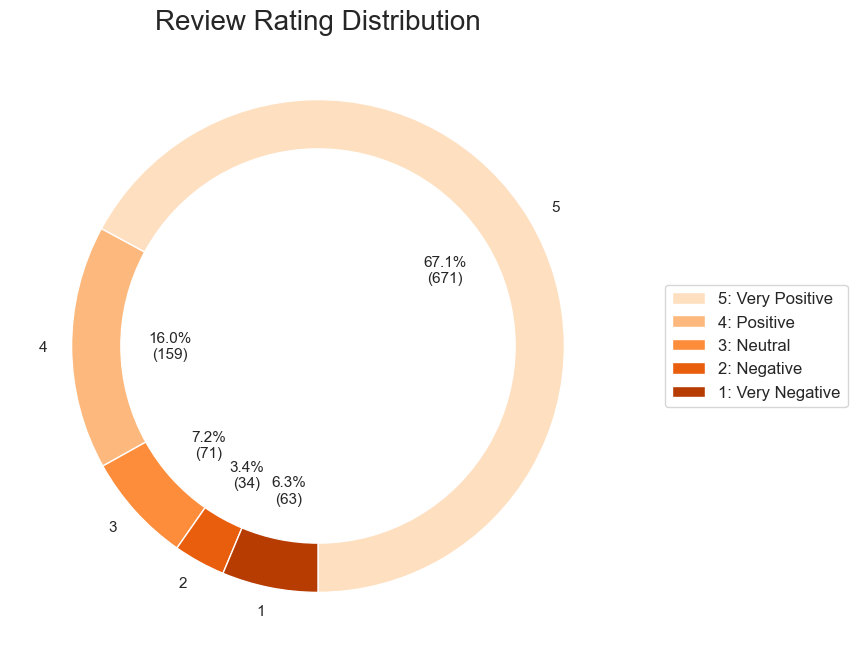

In [250]:
#plot distribution of ratings per sentiment type
ratings_counts = dfr["rating_x"].value_counts().sort_index(ascending=False)
labels = ratings_counts.index
sizes = ratings_counts.values
#plot dounut distribution
custom_colors = sns.color_palette("Oranges", 5)
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100):,})', startangle=270, colors=custom_colors, wedgeprops=dict(width=0.2), textprops={'fontsize': 11})
plt.title("Review Rating Distribution", size=20)
plt.legend(["5: Very Positive", "4: Positive", "3: Neutral", "2: Negative", "1: Very Negative"], 
           loc="center left", bbox_to_anchor=(1.05, 0.5), fontsize=12)

plt.show()

<h3 style="color: saddlebrown;">Distribution of Overall Sentiment rating by Review</h3>

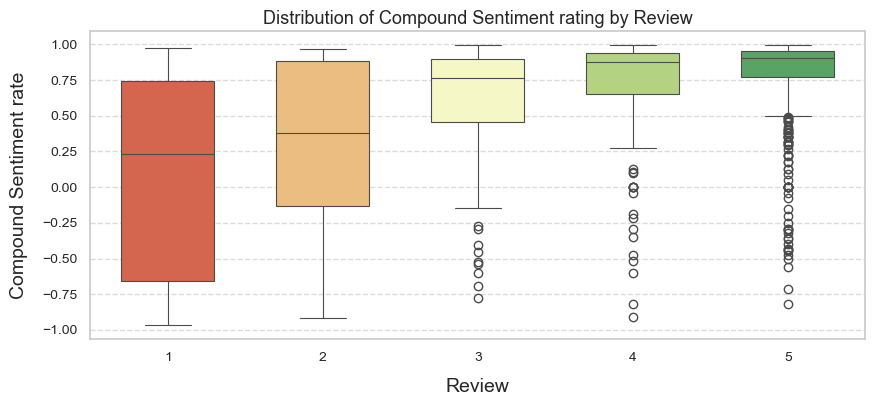

In [252]:
# Plot Distribution of Overall Sentiment rating by Review
custom_palette = sns.color_palette("RdYlGn", as_cmap=False, n_colors=5)

plt.figure(figsize=(10, 4)) 
sns.boxplot(data=data_vaders, x="rating_x", y="compound", palette=custom_palette, width=0.6, linewidth=0.8)
plt.title('Distribution of Compound Sentiment rating by Review', fontsize=13, pad=5)
plt.xlabel('Review', fontsize=14, labelpad=10)
plt.ylabel('Compound Sentiment rate', fontsize=14, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3 style="color: saddlebrown;">Plot Distribution of all sentiment rating by review</h3>

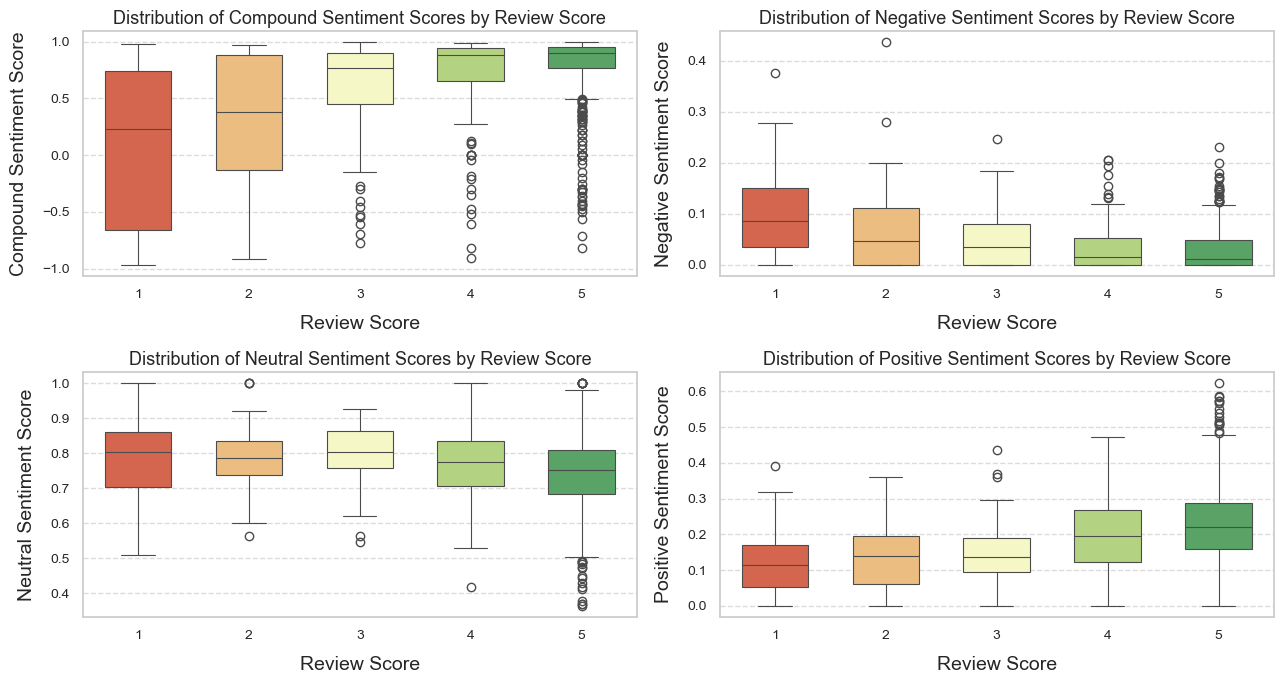

In [254]:
#Plot Distribution of all sentiment rating by review
custom_palette = sns.color_palette("RdYlGn", as_cmap=False, n_colors=5)
fig, axes = plt.subplots(2, 2, figsize=(13, 7))

# Plot Distribution of Overall Sentiment rating by Review
sns.boxplot(data=data_vaders, x="rating_x", y="compound", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Compound Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[0, 0].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[0, 0].set_ylabel('Compound Sentiment Score', fontsize=14, labelpad=10)
axes[0, 0].tick_params(axis='x', labelsize=10)
axes[0, 0].tick_params(axis='y', labelsize=10)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Distribution of negative Sentiment rating by Review
sns.boxplot(data=data_vaders, x="rating_x", y="neg", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Negative Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[0, 1].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[0, 1].set_ylabel('Negative Sentiment Score', fontsize=14, labelpad=10)
axes[0, 1].tick_params(axis='x', labelsize=10)
axes[0, 1].tick_params(axis='y', labelsize=10)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Distribution of Neutral Sentiment rating by Review
sns.boxplot(data=data_vaders, x="rating_x", y="neu", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Neutral Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[1, 0].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[1, 0].set_ylabel('Neutral Sentiment Score', fontsize=14, labelpad=10)
axes[1, 0].tick_params(axis='x', labelsize=10)
axes[1, 0].tick_params(axis='y', labelsize=10)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Distribution of Positive Sentiment rating by Review
sns.boxplot(data=data_vaders, x="rating_x", y="pos", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Positive Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[1, 1].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[1, 1].set_ylabel('Positive Sentiment Score', fontsize=14, labelpad=10)
axes[1, 1].tick_params(axis='x', labelsize=10)
axes[1, 1].tick_params(axis='y', labelsize=10)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3 style="color: saddlebrown;">Distribution of Overall Sentiment is_recommended by Review</h3>

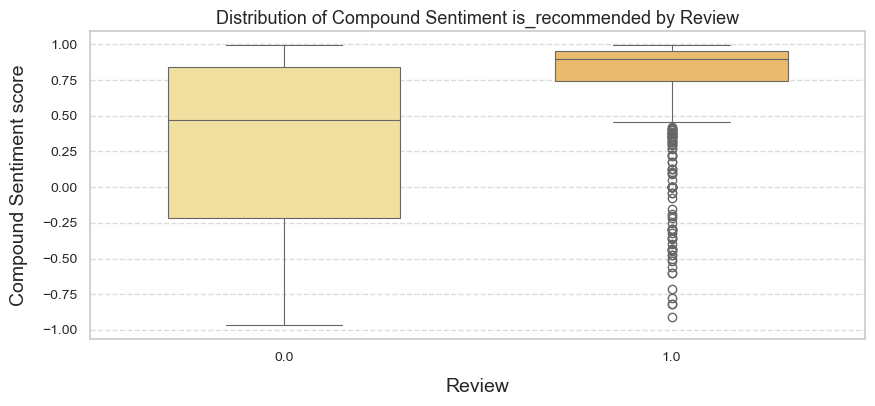

In [256]:
# Distribution of Overall Sentiment is_recommended by Review
custom_palette = sns.color_palette("YlOrRd", as_cmap=False, n_colors=5)
plt.figure(figsize=(10, 4)) 
sns.boxplot(data=data_vaders, x="is_recommended", y="compound", palette=custom_palette, width=0.6, linewidth=0.8)
plt.title('Distribution of Compound Sentiment is_recommended by Review', fontsize=13, pad=5)
plt.xlabel('Review', fontsize=14, labelpad=10)
plt.ylabel('Compound Sentiment score', fontsize=14, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3 style="color: saddlebrown;">Distribution of all sentiment is_recommened by review</h3>

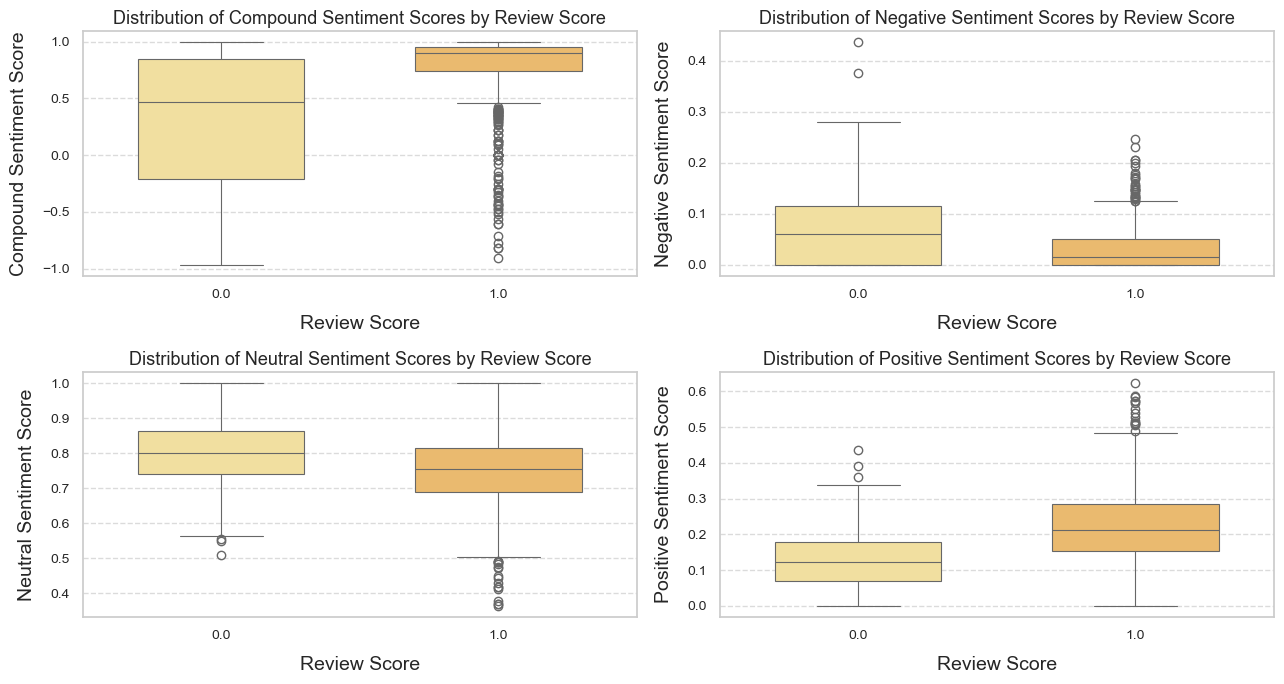

In [258]:
#Plot Distribution of all sentiment rating by review
custom_palette = sns.color_palette("YlOrRd", as_cmap=False, n_colors=5)
fig, axes = plt.subplots(2, 2, figsize=(13, 7))

# Plot Distribution of Overall Sentiment rating by Review
sns.boxplot(data=data_vaders, x="is_recommended", y="compound", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Compound Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[0, 0].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[0, 0].set_ylabel('Compound Sentiment Score', fontsize=14, labelpad=10)
axes[0, 0].tick_params(axis='x', labelsize=10)
axes[0, 0].tick_params(axis='y', labelsize=10)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Distribution of negative Sentiment rating by Review
sns.boxplot(data=data_vaders, x="is_recommended", y="neg", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Negative Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[0, 1].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[0, 1].set_ylabel('Negative Sentiment Score', fontsize=14, labelpad=10)
axes[0, 1].tick_params(axis='x', labelsize=10)
axes[0, 1].tick_params(axis='y', labelsize=10)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Distribution of Neutral Sentiment rating by Review
sns.boxplot(data=data_vaders, x="is_recommended", y="neu", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Neutral Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[1, 0].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[1, 0].set_ylabel('Neutral Sentiment Score', fontsize=14, labelpad=10)
axes[1, 0].tick_params(axis='x', labelsize=10)
axes[1, 0].tick_params(axis='y', labelsize=10)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Distribution of Positive Sentiment rating by Review
sns.boxplot(data=data_vaders, x="is_recommended", y="pos", palette=custom_palette, width=0.6, linewidth=0.8, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Positive Sentiment Scores by Review Score', fontsize=13, pad=5)
axes[1, 1].set_xlabel('Review Score', fontsize=14, labelpad=10)
axes[1, 1].set_ylabel('Positive Sentiment Score', fontsize=14, labelpad=10)
axes[1, 1].tick_params(axis='x', labelsize=10)
axes[1, 1].tick_params(axis='y', labelsize=10)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3 style="color: saddlebrown;">Sentiment analysis - RoBERTa model</h3>

In [260]:
#Preprocessing
# Define model name
model_name = "j-hartmann/emotion-english-distilroberta-base"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create pipeline
roberta = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

Device set to use cpu


<h3 style="color: saddlebrown;">Sequence classification by pre-trained transformer model</h3>

In [262]:
def mooder(text):
    """
    This function will return the mood of the text using tokenization
    """
    encoded_text = tokenizer(text, return_tensors="tf", max_length=512, truncation=True, padding="longest")
    output = model(encoded_text)
    scores = output.logits[0].numpy()
    moods = {
        "anger": scores[0],
        "disgust": scores[1],
        "fear": scores[2],
        "joy": scores[3],
        "neutral": scores[4],
        "sadness": scores[5],
        "surprise": scores[6]
    }
    return moods

In [263]:
#Define model
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [264]:
# Perform RoBERTa on review_text column as the main text variable
roberta_df = dfr["review_text"].apply(mooder)

In [265]:
roberta_df = pd.DataFrame(roberta_df)

In [266]:
# Normalize dictionary fromat
roberta_scores = pd.json_normalize(roberta_df["review_text"])

In [267]:
# Normalize roberta scores for better interpretation
def normalize_logits(row):
      scores = np.exp(row)
      return scores / scores.sum()

# Range of 0 to 1
normalized_scores = roberta_scores.apply(normalize_logits, axis=1)
normalized_scores.head(10)

anger   disgust      fear       joy   neutral   sadness  surprise
0  0.001423  0.005737  0.000759  0.944150  0.036359  0.006719  0.004852
1  0.014387  0.040452  0.007301  0.037914  0.694553  0.007981  0.197411
2  0.013160  0.212961  0.004327  0.176922  0.491526  0.012233  0.088871
3  0.008512  0.006976  0.001130  0.309368  0.160102  0.007042  0.506870
4  0.006019  0.001800  0.001301  0.871974  0.065681  0.003231  0.049994
5  0.007345  0.071941  0.003963  0.722133  0.160473  0.017721  0.016424
6  0.008693  0.341171  0.011550  0.135276  0.480112  0.008719  0.014480
7  0.007414  0.025047  0.012562  0.478421  0.453649  0.010091  0.012816
8  0.007434  0.033559  0.003467  0.001713  0.025688  0.014636  0.913502
9  0.001441  0.001870  0.000822  0.893716  0.021773  0.010975  0.069403

In [268]:
#Create dataframe with RoBERTa scores
dfr.reset_index(drop=True, inplace=True)
moods = pd.concat([dfr, roberta_scores], axis=1)

In [269]:
# Sorting by joy (customer satisfaction)
moods.sort_values(by="joy", ascending=True).sample(3)

review_text  \
387  Amazing!!!! Love this product!  Super hydratin...   
742  Shani Retinol Reform has to be the best retino...   
872  Absolutely in love with this product. Use to h...   

               review_title  \
387                 Love ❤️   
742  Amazing Retinol Serum!   
872       Under eye miracle   

                                            highlights  rating_x  \
387  ['Radiant Finish', 'High Shine Finish', 'Best ...         5   
742  ['Vegan', 'allure 2020 Best of Beauty Award Wi...         5   
872  ['Good for: Dryness', 'Good for: Dark Circles'...         5   

     is_recommended  loves_count  total_feedback_count     anger   disgust  \
387             1.0        13764                     0 -1.221488 -1.651030   
742             1.0        12100                     0 -0.867438 -0.840541   
872             1.0        60266                     0 -0.970251  1.035428   

         fear       joy   neutral   sadness  surprise  
387 -1.475909  3.118206  0.427173 -0.908472  3.162424  
742 -2.009325  2.187933  2.890755 -0.865356  0.656567  
872 -0.974633  0.307979  3.124651 -0.280954 -1.768705

<h3 style="color: saddlebrown;">Plot RoBERTa mood scores</h3>

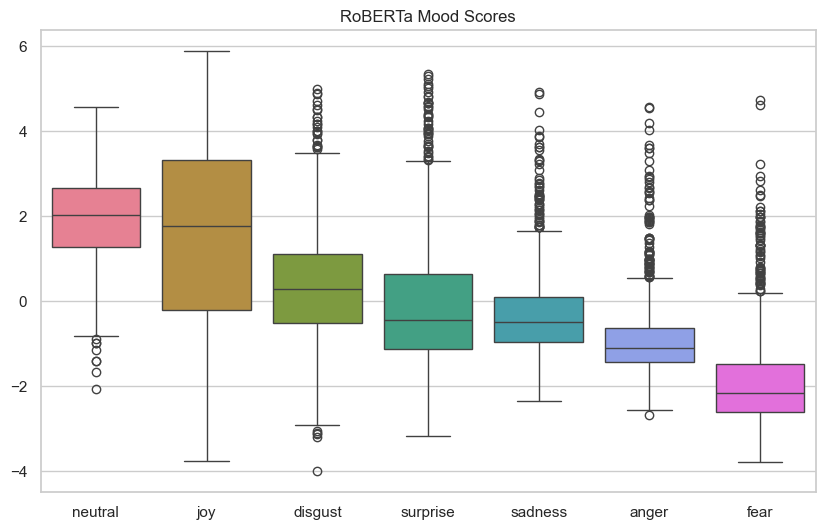

In [271]:
#Plot Roberta mood scores
# Sort by median
sorted_columns = roberta_scores.median().sort_values(ascending=False).index
# Plot sorted boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=roberta_scores[sorted_columns])  # Sort data by median values
plt.title("RoBERTa Mood Scores")
plt.show()